## Load necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
from fancyimpute import KNN
from sklearn import preprocessing
from scipy.stats import norm
from scipy import stats
import math

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load the train dataset
ames_train = pd.read_csv('train.csv')

In [3]:
# look at the 
ames_train.info()
# nrows = 1460
# ncols = 81 with few missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# Column names as a list
ames_train.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [5]:
# Load the test dataset
ames_test = pd.read_csv('test.csv')

In [6]:
# look at the test dataset 
ames_test.info()
# nrows = 1460
# ncols = 81 with few missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [7]:
# Column names as a list
ames_test.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [8]:
# Combine the train and the test dataframes for cleaning purpose.
# However we should be careful not to make any changes to the dataframe that leaks any
# information into the test data that can cause a problem during our machine learning task
ames_train_test = pd.concat([ames_train,ames_test])

# Concatenating the dataframes rearranged the columns in alphabetical order
# Rearrange the columns as in the original dataframe
ames_train_test = ames_train_test[['Id','MSSubClass','MSZoning', 'LotFrontage','LotArea', 'Street', 'Alley', 'LotShape', 
           'LandContour', 'Utilities', 'LotConfig', 'LandSlope','Neighborhood', 'Condition1', 'Condition2', 
           'BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl',
           'Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation',
           'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2',
           'BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC','CentralAir','Electrical','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','GarageType',
           'GarageYrBlt','GarageFinish','GarageCars', 'GarageArea','GarageQual','GarageCond','PavedDrive',
           'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC','Fence',
           'MiscFeature','MiscVal','MoSold','YrSold','SaleType','SaleCondition','SalePrice']] 

In [9]:
ames_train_test.to_csv('ames_train_test.csv', index=False)

## Explore the Dataset

We will explore the combined train and test datset. We will examine all the features in the dataset and focus on finding duplicated data, missing data, redundant features and dropping features that don't provide any useful information. Then we will then focus on extracting any new information from the existing features if necessary

In [131]:
# Load the train_test dataframe as 'ames'
ames = pd.read_csv('ames_train_test.csv')

In [132]:
# Make a copy of the original dataframe and call it 'ames1' to avoid making changes to the original dataframe
ames1 = ames.copy()

In [133]:
# Look at a few observations from the dataframe. One can use a df.head() or a df.sample()\
# while df.head() shows the first five rows, df.sample returns n specified random observations 
ames1.sample(5) # here n = 5

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
679    680          20       RL          NaN     9945   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl       Sawyer       Norm       Norm     1Fam     1Story            5            5       1961          1961       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace        57.0        TA        TA     CBlock       TA       TA           No          Rec       827.0          Unf         0.0      161.0        988.0    GasA        TA          Y      SBrkr       988         0             0        988           1.0           0.0         1         0             3             1          TA             5        Typ           0         NaN     Detchd       1963.0          Unf         2.0       572.0         TA         TA          Y           0            0              0          0            0         0    NaN    NaN         NaN        0      10    2007       WD        Normal   128500.0
2783  2784         190       RM         50.0     6000   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      OldTown       Norm       Norm   2fmCon     1Story            5            7       1955          1955       Hip  CompShg     Wd Sdng     Wd Sdng       None         0.0        TA        TA     CBlock       TA       TA           Av          GLQ       576.0          Unf         0.0      384.0        960.0    GasA        TA          Y      FuseA       960         0             0        960           1.0           0.0         1         0             3             1          TA             5        Typ           0         NaN     Detchd       1976.0          Unf         2.0       576.0         TA         TA          Y           0            0              0          0            0         0    NaN    NaN         NaN        0       6    2006       WD        Normal        NaN
2823  2824          80       RL         78.0    11679   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      Edwards       Norm       Norm     1Fam       SLvl            5            5       1962          1962     Gable  CompShg     Plywood     Plywood      Stone        96.0        TA        TA     CBlock       TA       TA           Gd          ALQ       612.0          Rec      1164.0        0.0       1776.0    GasA        Ex          Y      SBrkr      1560         0             0       1560           0.0           1.0         2         0             3             1          TA             6       Min2           1          Fa     Attchd       1962.0          Fin         2.0       528.0         TA         TA          Y         453          253            144          0            0         0    NaN  MnPrv         NaN        0       5    2006       WD        Normal        NaN
375    376          30       RL          NaN    10020   Pave   NaN      IR1         Low    AllPub    Inside       Sev      Edwards       Norm       Norm     1Fam     1Story            1            1       1922          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None         0.0        Fa        Fa     BrkTil       Fa       Po           Gd          BLQ       350.0          Unf         0.0   

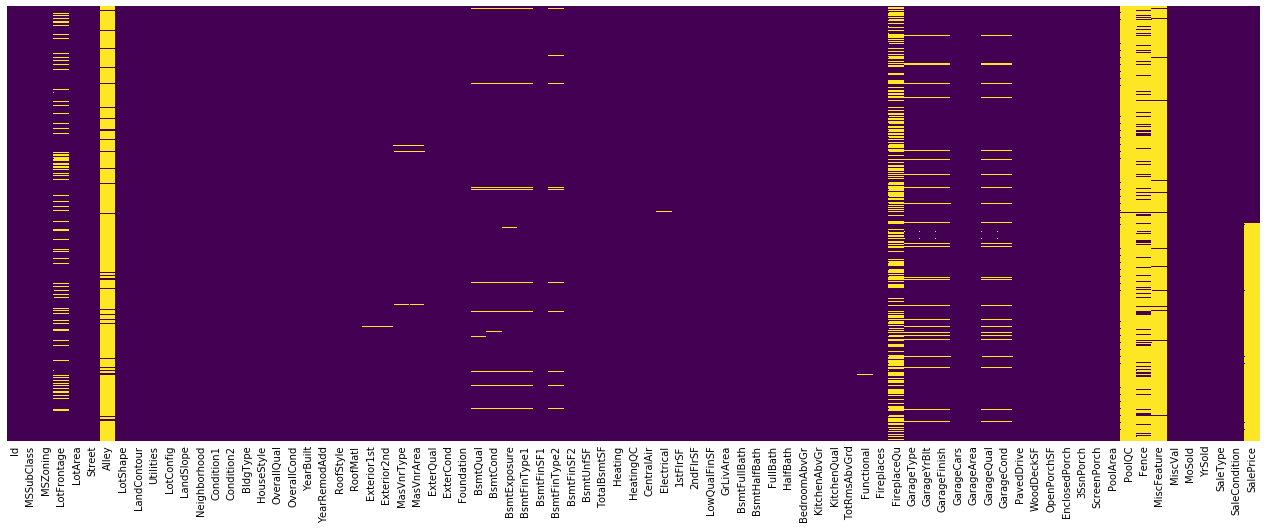

In [134]:
# Visualizing the missing values. Heatmaps are a nice way of looking at the missingness
# Yellow represents the missing values.
f, ax = plt.subplots(figsize = (20,8))
sns.heatmap(ames1.isnull(), yticklabels = False, cbar = False, cmap="viridis")

In [135]:
# See the column data types and 
# non-missing values using .info()
ames1.info()
# 1460 train observations
# 1459 test observations
# 81 features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

In [136]:
# Make a list of all columns in the dataframe
ames1.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [137]:
ames1.shape
# 81 columns and 2919 rows

(2919, 81)

### Duplicated Rows

In [138]:
# Look for duplicated rows
# None were found
print ('There are {} duplicated rows in the dataframe'.format(ames1.duplicated().sum()))

There are 0 duplicated rows in the dataframe


### Missing Values

In [139]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

We will make use of heatmap data visualization of the DataFrame to keep track of our datacleaning process, especially when dealing with the missingness. We will compare the columns from the original dataframe and the updated dataframe as we go forward with our cleaning process.

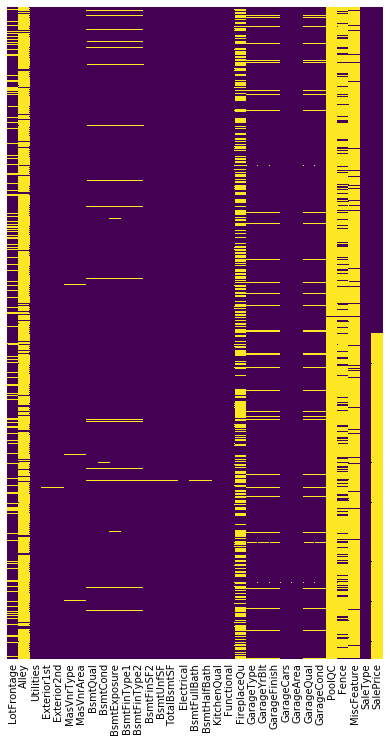

In [140]:
ames_missing = ames[['LotFrontage','Alley','Utilities','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Electrical', 'BsmtFullBath',
'BsmtHalfBath','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars',
'GarageArea','GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature', 'SaleType', 'SalePrice']]
f, ax = plt.subplots(figsize = (6,12))
sns.heatmap(ames_missing.isnull(), yticklabels = False, cbar = False, cmap="viridis")


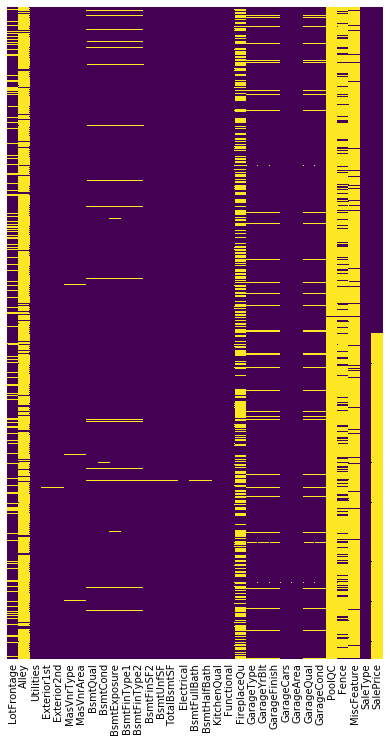

In [141]:
ames1_missing = ames1[['LotFrontage','Alley','Utilities','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Electrical', 'BsmtFullBath',
'BsmtHalfBath','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars',
'GarageArea','GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature', 'SaleType', 'SalePrice']]
f, ax = plt.subplots(figsize = (6,12))
sns.heatmap(ames1_missing.isnull(), yticklabels = False, cbar = False, cmap="viridis")

In [142]:
# Calculate the percent of missing values
print (missing_values_table(ames1))

Your selected dataframe has 81 columns.
There are 35 columns that have missing values.
              Missing Values  % of Total Values
PoolQC                  2909               99.7
MiscFeature             2814               96.4
Alley                   2721               93.2
Fence                   2348               80.4
SalePrice               1459               50.0
FireplaceQu             1420               48.6
LotFrontage              486               16.6
GarageCond               159                5.4
GarageYrBlt              159                5.4
GarageFinish             159                5.4
GarageQual               159                5.4
GarageType               157                5.4
BsmtExposure              82                2.8
BsmtCond                  82                2.8
BsmtQual                  81                2.8
BsmtFinType2              80                2.7
BsmtFinType1              79                2.7
MasVnrType                24                0.8
M

## Data preprocessing (Narrowing down our columns)

It is very cumbersome to try to explore all the features at once, so instead we'll break it up into 16 smaller selection of features and examine them. Particularly we want to pay attention to any feature that: 

•	contains redundant information because they are highly correlated

•	have a high percentage of missing values

•	have only one value or one of the values has insignificant frequency in the dataset

### First Group Of Columns

In [143]:
house_lot_features = ['Id','MSSubClass','MSZoning','LotFrontage','LotArea','Street','Alley','LotShape','LandContour','LotConfig','LandSlope',
'Neighborhood','Condition1','Condition2']
house_lot_features_na = ames1[house_lot_features]

In [144]:
# Missing values before cleaning
print(missing_values_table(house_lot_features_na))

Your selected dataframe has 14 columns.
There are 3 columns that have missing values.
             Missing Values  % of Total Values
Alley                  2721               93.2
LotFrontage             486               16.6
MSZoning                  4                0.1


In [145]:
# column 'Alley' marked as NaN indicate the absence of the features.
ames1['Alley'].fillna('None', inplace = True)

In [146]:
#ames1['Exterior1st'] = ames1['Exterior1st'].fillna(ames1['Exterior1st'].mode()[0])
ames1['MSZoning'] = ames1['MSZoning'].fillna(ames1['MSZoning'].mode()[0])

In [147]:
house_lot_features = ['Id','MSSubClass','MSZoning','LotFrontage','LotArea','Street','Alley','LotShape','LandContour','LotConfig','LandSlope',
'Neighborhood','Condition1','Condition2']
house_lot_features_na = ames1[house_lot_features]

In [148]:
# Missing values after cleaning
print(missing_values_table(house_lot_features_na))

Your selected dataframe has 14 columns.
There are 1 columns that have missing values.
             Missing Values  % of Total Values
LotFrontage             486               16.6


In [90]:
ames1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non

### Second Group Of Columns

In [149]:
building_house = ['BldgType','HouseStyle','OverallQual','OverallCond']
building_house_features = ames1[building_house]
building_house_features

BldgType HouseStyle  OverallQual  OverallCond
0        1Fam     2Story            7            5
1        1Fam     1Story            6            8
2        1Fam     2Story            7            5
3        1Fam     2Story            7            5
4        1Fam     2Story            8            5
5        1Fam     1.5Fin            5            5
6        1Fam     1Story            8            5
7        1Fam     2Story            7            6
8        1Fam     1.5Fin            7            5
9      2fmCon     1.5Unf            5            6
10       1Fam     1Story            5            5
11       1Fam     2Story            9            5
12       1Fam     1Story            5            6
13       1Fam     1Story            7            5
14       1Fam     1Story            6            5
15       1Fam     1.5Unf            7            8
16       1Fam     1Story            6            7
17     Duplex     1Story            4            5
18       1Fam     1Story            5            5
19       1Fam     1Story            5            6
20       1Fam     2Story            8            5
21       1Fam     1.5Unf            7            7
22       1Fam     1Story            8            5
23     TwnhsE     1Story            5            7
24       1Fam     1Story            5            8
25       1Fam     1Story            8            5
26       1Fam     1Story            5            7
27       1Fam     1Story            8            5
28       1Fam     1Story            5            6
29       1Fam     1Story            4            6
30       1Fam     2Story            4            4
31       1Fam     1Story            5            6
32       1Fam     1Story            8            5
33       1Fam     1Story            5            5
34     TwnhsE     1Story            9            5
35       1Fam     2Story            8            5
36       1Fam     1Story            5            5
37       1Fam     1Story            5            6
38       1Fam     1Story            5            7
39     Duplex     1Story            4            5
40       1Fam     1Story            6            5
41       1Fam     1Story            5            6
42       1Fam     SFoyer            5            7
43       1Fam     1Story            5            6
44       1Fam     1Story            5            6
45     TwnhsE     1Story            9            5
46       1Fam     1.5Fin            7            5
47       1Fam     1Story            8            5
48     2fmCon     2Story            4            5
49       1Fam     1Story            5            7
50       1Fam     2Story            6            6
51       1Fam     1.5Fin            6            6
52     Duplex     1Story            5            5
53       1Fam     1Story            9            5
54       1Fam       SLvl            5            5
55       1Fam     1Story            6            5
56      Twnhs     2Story            8            5
57       1Fam     2Story            7            5
58       1Fam     2Story           10            5
59       1Fam     1Story            5            7
60       1Fam     1Story            6            5
61       1Fam     2.5Unf            5            7
62     TwnhsE     1Story            8            5
63       1Fam     2Story            7            6
64       1Fam     2Story            7            5
65       1Fam     2Story            8            5
66       1Fam     1Story            7            5
67       1Fam     1Story            7            5
68       1Fam     1Story            4            6
69       1Fam     1.5Fin            7            4
70       1Fam     1Story            7            6
71       1Fam     1Story            4            6
72       1Fam     2Story            7            5
73       1Fam     1Story            5            7
74       1Fam     2Story            3            6
75      Twnhs       SLvl            4            5
76       1Fam     1Story            4            7
77       1Fam     1.5Fin   

In [150]:
# Missing values before cleaning
print(missing_values_table(building_house_features))

Your selected dataframe has 4 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


### Third Group Of Columns

In [151]:
# Subset this group and explore
Yr_Built_Modified = ['YearBuilt','YearRemodAdd']
Yr_Built_Modified_features = ames1[Yr_Built_Modified]
Yr_Built_Modified_features

YearBuilt  YearRemodAdd
0          2003          2003
1          1976          1976
2          2001          2002
3          1915          1970
4          2000          2000
5          1993          1995
6          2004          2005
7          1973          1973
8          1931          1950
9          1939          1950
10         1965          1965
11         2005          2006
12         1962          1962
13         2006          2007
14         1960          1960
15         1929          2001
16         1970          1970
17         1967          1967
18         2004          2004
19         1958          1965
20         2005          2006
21         1930          1950
22         2002          2002
23         1976          1976
24         1968          2001
25         2007          2007
26         1951          2000
27         2007          2008
28         1957          1997
29         1927          1950
30         1920          1950
31         1966          2006
32         2007          2007
33         1959          1959
34         2005          2005
35         2004          2005
36         1994          1995
37         1954          1990
38         1953          2007
39         1955          1955
40         1965          1965
41         1959          1959
42         1983          1983
43         1975          1980
44         1959          1959
45         2005          2005
46         2003          2003
47         2006          2006
48         1920          2008
49         1966          1966
50         1997          1997
51         1934          1950
52         1963          1963
53         1981          1987
54         1955          1955
55         1964          1964
56         1999          2000
57         2004          2004
58         2006          2006
59         1972          1972
60         2004          2004
61         1920          1996
62         2006          2006
63         1921          1950
64         1997          1998
65         2004          2005
66         1970          1989
67         2003          2003
68         1945          1950
69         1953          1953
70         1973          1973
71         1982          2006
72         1998          1998
73         1954          2003
74         1915          1950
75         1973          1973
76         1956          1956
77         1948          2001
78         1968          1968
79         1910          1981
80         1968          1968
81         1998          1998
82         2007          2007
83         1960          1960
84         1995          1996
85         1991          1992
86         2005          2005
87         2009          2009
88         1915          1982
89         1994          1995
90         1950          1950
91         1961          1961
92         1921          2006
93         1910          1998
94         1997          1997
95         1993          1993
96         1999          1999
97         1965          1965
98         1920          1950
99         1959          1959
100        1977          2001
101        1985          1985
102        1979          1979
103        2009          2009
104        1931          1950
105        2003          2004
106        1885          1995
107        1948          1950
108        1919          2005
109        1977          1977
110        1954          1972
111        2000          2000
112        2007          2007
113        1953          1953
114        1945          2002
115        1999          1999
116        1962          1962
117        2006          2007
118        1990          1990
119        2005          2006
120        1969          1969
121        1939          1950
122        1958          1958
123        1993          1993
124        1979          1998
125        1935          1982
126        1976          1976
127        1930          1950
128        1966          1966
129        1958          1991
130        1966          1966
131        2000          2000
132        1959 

In [152]:
# Missing values before cleaning
print(missing_values_table(Yr_Built_Modified_features))

Your selected dataframe has 2 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


YearBuilt provides very important information about the age of the house. But the Year Built by itself doesn't have any useful information. To make it a useful feature we can use this feature to extract the age of the house. 

In [153]:
# Create New Column HouseAge instead of YearBuilt
ames1['HouseAge'] = [(2018 - i) for i in ames1['YearBuilt']]

In [154]:
# Drop YearBuilt and YearRemodAdd
ames1.drop(['YearBuilt','YearRemodAdd'], axis =1, inplace = True)

In [155]:
# Check the df after the addition of a new column
ames1.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  HouseAge
947    948          20       RL         85.0    14536   Pave  None      Reg         Lvl    AllPub    Inside       Gtl       Timber       Norm       Norm     1Fam     1Story            8            5       Hip  CompShg     VinylSd     VinylSd    BrkFace       236.0        Gd        TA      PConc       Gd       TA           Av          GLQ      1300.0          Unf         0.0      316.0       1616.0    GasA        Ex          Y      SBrkr      1629         0             0       1629           1.0           0.0         2         0             3             1          Gd             9        Typ           1          Gd     Attchd       2002.0          Fin         3.0       808.0         TA         TA          Y           0          252              0          0            0         0    NaN   NaN         NaN        0      11    2007       WD        Normal   270000.0        16
2214  2215          30       RM         60.0     7392   Pave  None      Reg         Lvl    AllPub    Inside       Gtl       IDOTRR       Norm       Norm     1Fam     1Story            5            7     Gable  CompShg     Wd Sdng     Wd Sdng       None         0.0        TA        TA     BrkTil       TA       TA           No          Unf         0.0          Unf         0.0      520.0        520.0    GasA        TA          Y      FuseA       912         0             0        912           0.0           0.0         1         0             2             1          TA             5        Typ           0         NaN     Detchd       1934.0          RFn         1.0       360.0         TA         TA          Y           0           90              0          0            0         0    NaN   NaN         NaN        0       5    2008       WD        Normal        NaN        88
2076  2077          20       RL         80.0     8000   Pave  None      Reg         Lvl    AllPub    Inside       Gtl        NAmes       Norm       Norm     1Fam     1Story            5            6     Gable  CompShg     BrkFace     Wd Sdng       None         0.0        TA        TA      PConc       TA       TA           No          BLQ       476.0          Rec       488.0      292.0       1256.0    GasA        Gd          Y      FuseA      1256         0             0       1256           1.0           0.0         1         1             3             1          Gd             6        Typ           0         NaN     Attchd       1959.0          RFn         1.0       311.0         TA         TA          Y           0          240              0          0            0         0    NaN   NaN         NaN        0       5    2008       WD        Normal        NaN        59
1359  1360          20       RL        129.0    16737   Pave  None      Reg         Lvl    AllPub       FR3       Gtl      NridgHt       Norm       Norm     1Fam     1Story            9            5       Hip  CompShg     VinylSd     VinylSd    BrkFace        66.0        Gd        TA      PConc       Ex       TA           Av          GLQ      1447.0          Unf         0.0      533.0       1980.0    GasA        Ex          Y      SBrkr      1980         0        

### Fourth Group Of Columns

In [156]:
house_exterior = ['RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation']
house_exterior_features = ames1[house_exterior]
house_exterior_features

RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation
0        Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc
1        Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock
2        Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc
3        Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil
4        Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA      PConc
5        Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA       Wood
6        Gable  CompShg     VinylSd     VinylSd      Stone       186.0        Gd        TA      PConc
7        Gable  CompShg     HdBoard     HdBoard      Stone       240.0        TA        TA     CBlock
8        Gable  CompShg     BrkFace     Wd Shng       None         0.0        TA        TA     BrkTil
9        Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     BrkTil
10         Hip  CompShg     HdBoard     HdBoard       None         0.0        TA        TA     CBlock
11         Hip  CompShg     WdShing     Wd Shng      Stone       286.0        Ex        TA      PConc
12         Hip  CompShg     HdBoard     Plywood       None         0.0        TA        TA     CBlock
13       Gable  CompShg     VinylSd     VinylSd      Stone       306.0        Gd        TA      PConc
14         Hip  CompShg     MetalSd     MetalSd    BrkFace       212.0        TA        TA     CBlock
15       Gable  CompShg     Wd Sdng     Wd Sdng       None         0.0        TA        TA     BrkTil
16       Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace       180.0        TA        TA     CBlock
17       Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA       Slab
18       Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA      PConc
19         Hip  CompShg     BrkFace     Plywood       None         0.0        TA        TA     CBlock
20       Gable  CompShg     VinylSd     VinylSd    BrkFace       380.0        Gd        TA      PConc
21       Gable  CompShg     Wd Sdng     Wd Sdng       None         0.0        TA        TA      PConc
22         Hip  CompShg     VinylSd     VinylSd    BrkFace       281.0        Gd        TA      PConc
23       Gable  CompShg     CemntBd     CmentBd       None         0.0        TA        TA      PConc
24       Gable  CompShg     Plywood     Plywood       None         0.0        TA        Gd     CBlock
25       Gable  CompShg     VinylSd     VinylSd      Stone       640.0        Gd        TA      PConc
26       Gable  CompShg     Wd Sdng     Wd Sdng       None         0.0        TA        TA     CBlock
27       Gable  CompShg     VinylSd     VinylSd      Stone       200.0        Gd        TA      PConc
28       Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock
29       Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     BrkTil
30     Gambrel  CompShg     BrkFace     BrkFace       None         0.0        TA        Fa     BrkTil
31       Gable  CompShg     HdBoard     HdBoard       None         0.0        TA        TA     CBlock
32       Gable  CompShg     VinylSd     VinylSd       None         0.0        Gd        TA      PConc
33         Hip  CompShg     BrkFace     BrkFace       None         0.0        TA        TA     CBlock
34         Hip  CompShg     MetalSd     MetalSd    BrkFace       246.0        Ex        TA      PConc
35       Gable  CompShg     VinylSd     VinylSd      Stone       132.0        Gd        TA      PConc
36       Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA      PConc
37         Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace       650.0        TA        TA     CBlock
38       Gable  CompShg    

In [157]:
print(missing_values_table(house_exterior_features))

Your selected dataframe has 9 columns.
There are 4 columns that have missing values.
             Missing Values  % of Total Values
MasVnrType               24                0.8
MasVnrArea               23                0.8
Exterior1st               1                0.0
Exterior2nd               1                0.0


In [158]:
# We can impute the missing values with the most frequent observation
ames1['Exterior1st'] = ames1['Exterior1st'].fillna(ames1['Exterior1st'].mode()[0])
ames1['Exterior2nd'] = ames1['Exterior2nd'].fillna(ames1['Exterior2nd'].mode()[0])

In [159]:
# NAs in basement related columns will indicate no masonry veneer
ames1['MasVnrType'].fillna('None',inplace=True) 

#NAs in basement related columns will indicate no masonry veneer. Thus replacing MasVnr Area with 0
ames1['MasVnrArea'].fillna(0,inplace=True) 

In [160]:
house_exterior = ['RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation']
house_exterior_features = ames1[house_exterior]
house_exterior_features

RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation
0        Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc
1        Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock
2        Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc
3        Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil
4        Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA      PConc
5        Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA       Wood
6        Gable  CompShg     VinylSd     VinylSd      Stone       186.0        Gd        TA      PConc
7        Gable  CompShg     HdBoard     HdBoard      Stone       240.0        TA        TA     CBlock
8        Gable  CompShg     BrkFace     Wd Shng       None         0.0        TA        TA     BrkTil
9        Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     BrkTil
10         Hip  CompShg     HdBoard     HdBoard       None         0.0        TA        TA     CBlock
11         Hip  CompShg     WdShing     Wd Shng      Stone       286.0        Ex        TA      PConc
12         Hip  CompShg     HdBoard     Plywood       None         0.0        TA        TA     CBlock
13       Gable  CompShg     VinylSd     VinylSd      Stone       306.0        Gd        TA      PConc
14         Hip  CompShg     MetalSd     MetalSd    BrkFace       212.0        TA        TA     CBlock
15       Gable  CompShg     Wd Sdng     Wd Sdng       None         0.0        TA        TA     BrkTil
16       Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace       180.0        TA        TA     CBlock
17       Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA       Slab
18       Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA      PConc
19         Hip  CompShg     BrkFace     Plywood       None         0.0        TA        TA     CBlock
20       Gable  CompShg     VinylSd     VinylSd    BrkFace       380.0        Gd        TA      PConc
21       Gable  CompShg     Wd Sdng     Wd Sdng       None         0.0        TA        TA      PConc
22         Hip  CompShg     VinylSd     VinylSd    BrkFace       281.0        Gd        TA      PConc
23       Gable  CompShg     CemntBd     CmentBd       None         0.0        TA        TA      PConc
24       Gable  CompShg     Plywood     Plywood       None         0.0        TA        Gd     CBlock
25       Gable  CompShg     VinylSd     VinylSd      Stone       640.0        Gd        TA      PConc
26       Gable  CompShg     Wd Sdng     Wd Sdng       None         0.0        TA        TA     CBlock
27       Gable  CompShg     VinylSd     VinylSd      Stone       200.0        Gd        TA      PConc
28       Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock
29       Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     BrkTil
30     Gambrel  CompShg     BrkFace     BrkFace       None         0.0        TA        Fa     BrkTil
31       Gable  CompShg     HdBoard     HdBoard       None         0.0        TA        TA     CBlock
32       Gable  CompShg     VinylSd     VinylSd       None         0.0        Gd        TA      PConc
33         Hip  CompShg     BrkFace     BrkFace       None         0.0        TA        TA     CBlock
34         Hip  CompShg     MetalSd     MetalSd    BrkFace       246.0        Ex        TA      PConc
35       Gable  CompShg     VinylSd     VinylSd      Stone       132.0        Gd        TA      PConc
36       Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA      PConc
37         Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace       650.0        TA        TA     CBlock
38       Gable  CompShg    

In [161]:
print(missing_values_table(house_exterior_features))

Your selected dataframe has 9 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


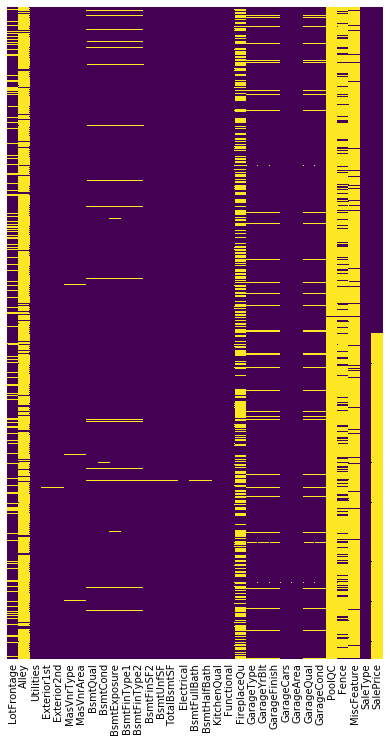

In [162]:
ames_missing = ames[['LotFrontage','Alley','Utilities','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Electrical', 'BsmtFullBath',
'BsmtHalfBath','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars',
'GarageArea','GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature', 'SaleType', 'SalePrice']]
f, ax = plt.subplots(figsize = (6,12))
sns.heatmap(ames_missing.isnull(), yticklabels = False, cbar = False, cmap="viridis")


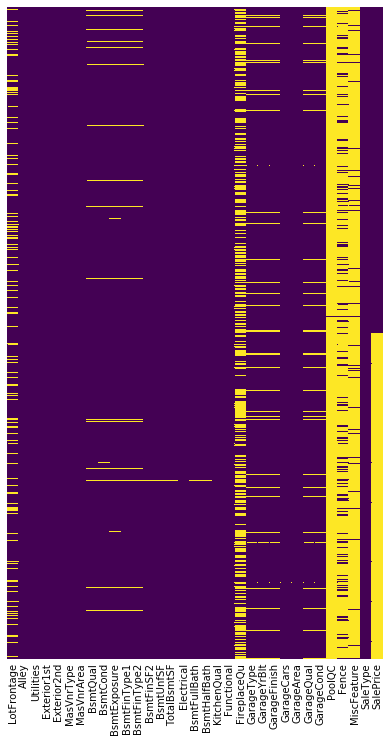

In [163]:
ames1_missing = ames1[['LotFrontage','Alley','Utilities','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Electrical', 'BsmtFullBath',
'BsmtHalfBath','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars',
'GarageArea','GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature', 'SaleType', 'SalePrice']]
f, ax = plt.subplots(figsize = (6,12))
sns.heatmap(ames1_missing.isnull(), yticklabels = False, cbar = False, cmap="viridis")


In [ ]:
house_lot_features = ['Id','MSSubClass','MSZoning','LotFrontage','LotArea','Street','Alley','LotShape','LandContour','LotConfig','LandSlope',
'Neighborhood','Condition1','Condition2']
house_lot_features_na = ames1[house_lot_features]

In [37]:
# Exterior1st & Exterior2nd: 
# Exterior covering on house

# The missing information is less than 1%. 

house_exterior_features.isna().sum()

RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType     24
MasVnrArea     23
ExterQual       0
ExterCond       0
Foundation      0
dtype: int64

In [40]:
house_exterior_features.isna().sum()

RoofStyle      0
RoofMatl       0
Exterior1st    0
Exterior2nd    0
MasVnrType     0
MasVnrArea     0
ExterQual      0
ExterCond      0
Foundation     0
dtype: int64

Let's take a look at the cleaning process so far by visualizing the heatmaps

### Fifth Group Of Columns

In [164]:
basement = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']
basement_features = ames1[basement]
basement_features

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF
0          Gd       TA           No          GLQ       706.0          Unf         0.0      150.0        856.0
1          Gd       TA           Gd          ALQ       978.0          Unf         0.0      284.0       1262.0
2          Gd       TA           Mn          GLQ       486.0          Unf         0.0      434.0        920.0
3          TA       Gd           No          ALQ       216.0          Unf         0.0      540.0        756.0
4          Gd       TA           Av          GLQ       655.0          Unf         0.0      490.0       1145.0
5          Gd       TA           No          GLQ       732.0          Unf         0.0       64.0        796.0
6          Ex       TA           Av          GLQ      1369.0          Unf         0.0      317.0       1686.0
7          Gd       TA           Mn          ALQ       859.0          BLQ        32.0      216.0       1107.0
8          TA       TA           No          Unf         0.0          Unf         0.0      952.0        952.0
9          TA       TA           No          GLQ       851.0          Unf         0.0      140.0        991.0
10         TA       TA           No          Rec       906.0          Unf         0.0      134.0       1040.0
11         Ex       TA           No          GLQ       998.0          Unf         0.0      177.0       1175.0
12         TA       TA           No          ALQ       737.0          Unf         0.0      175.0        912.0
13         Gd       TA           Av          Unf         0.0          Unf         0.0     1494.0       1494.0
14         TA       TA           No          BLQ       733.0          Unf         0.0      520.0       1253.0
15         TA       TA           No          Unf         0.0          Unf         0.0      832.0        832.0
16         TA       TA           No          ALQ       578.0          Unf         0.0      426.0       1004.0
17        NaN      NaN          NaN          NaN         0.0          NaN         0.0        0.0          0.0
18         TA       TA           No          GLQ       646.0          Unf         0.0      468.0       1114.0
19         TA       TA           No          LwQ       504.0          Unf         0.0      525.0       1029.0
20         Ex       TA           Av          Unf         0.0          Unf         0.0     1158.0       1158.0
21         TA       TA           No          Unf         0.0          Unf         0.0      637.0        637.0
22         Gd       TA           No          Unf         0.0          Unf         0.0     1777.0       1777.0
23         Gd       TA           No          GLQ       840.0          Unf         0.0      200.0       1040.0
24         TA       TA           Mn          Rec       188.0          ALQ       668.0      204.0       1060.0
25         Gd       TA           No          Unf         0.0          Unf         0.0     1566.0       1566.0
26         TA       TA           Mn          BLQ       234.0          Rec       486.0      180.0        900.0
27         Ex       TA           No          GLQ      1218.0          Unf         0.0      486.0       1704.0
28         TA       TA           Gd          BLQ      1277.0          Unf         0.0      207.0       1484.0
29         TA       TA           No          Unf         0.0          Unf         0.0      520.0        520.0
30         TA       TA           No          Unf         0.0          Unf         0.0      649.0        649.0
31         TA       TA           No          Unf         0.0          Unf         0.0     1228.0       1228.0
32         Ex       TA           Av          Unf         0.0          Unf         0.0     1234.0       1234.0
33         TA       TA           No          Rec      1018.0          Unf         0.0      380.0       1398.0
34         Ex       TA           No          GLQ      1153.0          Unf         0.0      408.0       1561.0
35         Ex       TA           Av          

In [165]:
print(missing_values_table(basement_features))

Your selected dataframe has 9 columns.
There are 9 columns that have missing values.
              Missing Values  % of Total Values
BsmtCond                  82                2.8
BsmtExposure              82                2.8
BsmtQual                  81                2.8
BsmtFinType2              80                2.7
BsmtFinType1              79                2.7
BsmtFinSF1                 1                0.0
BsmtFinSF2                 1                0.0
BsmtUnfSF                  1                0.0
TotalBsmtSF                1                0.0


In [166]:
# columns BsmtCond, BsmtExposure, BsmtQual, BsmtFinType1, BsmtFinType2 marked as NaN indicate the absence of these features.
basement_features_na = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
for col in basement_features_na:
    ames1[col].fillna("None", inplace = True)

In [167]:
basement_features = ames1[basement]
basement_features
print(missing_values_table(basement_features))

Your selected dataframe has 9 columns.
There are 4 columns that have missing values.
             Missing Values  % of Total Values
BsmtFinSF1                1                0.0
BsmtFinSF2                1                0.0
BsmtUnfSF                 1                0.0
TotalBsmtSF               1                0.0


In [168]:
# # columns with attributes like Pool, Fence etc. marked as NaN indicate the absence of these features.
'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2'

('BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2')

In [169]:
#NAs in basement related columns will indicate no basement. Thus replacing all areas and count column with 0 
ames1.BsmtFullBath.fillna(0,inplace=True)
ames1.BsmtHalfBath.fillna(0,inplace=True)
ames1.BsmtFinSF1.fillna(0,inplace=True)
ames1.BsmtFinSF2.fillna(0,inplace=True)
ames1.BsmtUnfSF.fillna(0,inplace=True)
ames1.TotalBsmtSF.fillna(0,inplace=True)

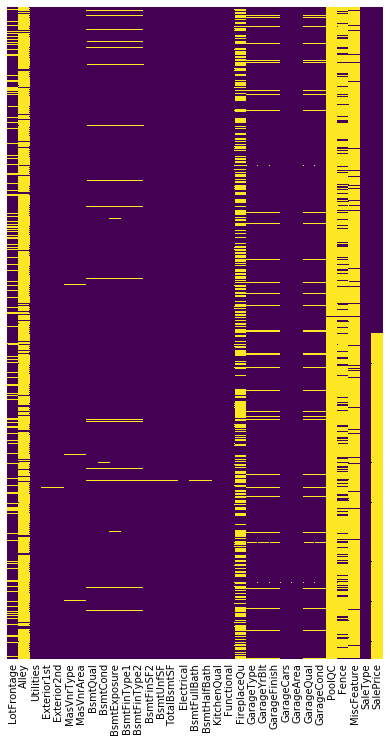

In [170]:
ames_missing = ames[['LotFrontage','Alley','Utilities','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Electrical', 'BsmtFullBath',
'BsmtHalfBath','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars',
'GarageArea','GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature', 'SaleType', 'SalePrice']]
f, ax = plt.subplots(figsize = (6,12))
sns.heatmap(ames_missing.isnull(), yticklabels = False, cbar = False, cmap="viridis")


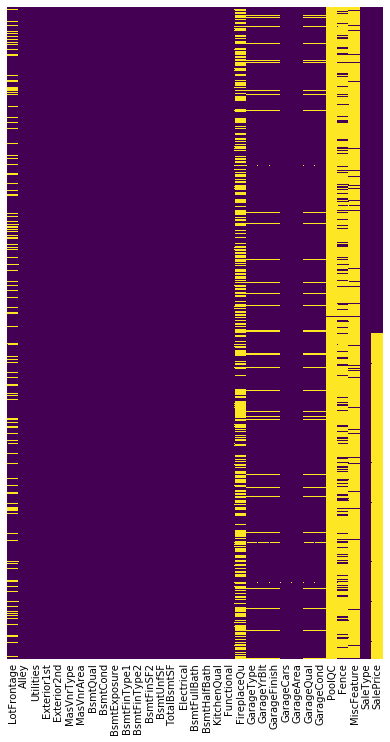

In [171]:
ames_missing1 = ames1[['LotFrontage','Alley','Utilities','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Electrical', 'BsmtFullBath',
'BsmtHalfBath','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars',
'GarageArea','GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature', 'SaleType', 'SalePrice']]
f, ax = plt.subplots(figsize = (6,12))
sns.heatmap(ames_missing1.isnull(), yticklabels = False, cbar = False, cmap="viridis")


In [172]:
# The data in the TotalBsmtSF area is distributed among three other columns:'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF'
ames1[['BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']].sample(5)

BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF
951        641.0         0.0      187.0        828.0
2029      1027.0         0.0      587.0       1614.0
1344         0.0         0.0      728.0        728.0
2642         0.0         0.0      525.0        525.0
2648       373.0       108.0      462.0        943.0

In [173]:
# Drop the following columns BsmtFinSF1, BsmtFinSF2, BsmtUnfSF
ames1.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)

### Sixth Group Of Columns

In [174]:
heating = ['Heating','HeatingQC','CentralAir','Electrical','Utilities']
heating_features = ames1[heating]
heating_features

Heating HeatingQC CentralAir Electrical Utilities
0       GasA        Ex          Y      SBrkr    AllPub
1       GasA        Ex          Y      SBrkr    AllPub
2       GasA        Ex          Y      SBrkr    AllPub
3       GasA        Gd          Y      SBrkr    AllPub
4       GasA        Ex          Y      SBrkr    AllPub
5       GasA        Ex          Y      SBrkr    AllPub
6       GasA        Ex          Y      SBrkr    AllPub
7       GasA        Ex          Y      SBrkr    AllPub
8       GasA        Gd          Y      FuseF    AllPub
9       GasA        Ex          Y      SBrkr    AllPub
10      GasA        Ex          Y      SBrkr    AllPub
11      GasA        Ex          Y      SBrkr    AllPub
12      GasA        TA          Y      SBrkr    AllPub
13      GasA        Ex          Y      SBrkr    AllPub
14      GasA        TA          Y      SBrkr    AllPub
15      GasA        Ex          Y      FuseA    AllPub
16      GasA        Ex          Y      SBrkr    AllPub
17      GasA        TA          Y      SBrkr    AllPub
18      GasA        Ex          Y      SBrkr    AllPub
19      GasA        TA          Y      SBrkr    AllPub
20      GasA        Ex          Y      SBrkr    AllPub
21      GasA        Ex          Y      FuseF    AllPub
22      GasA        Ex          Y      SBrkr    AllPub
23      GasA        TA          Y      SBrkr    AllPub
24      GasA        Ex          Y      SBrkr    AllPub
25      GasA        Ex          Y      SBrkr    AllPub
26      GasA        TA          Y      SBrkr    AllPub
27      GasA        Ex          Y      SBrkr    AllPub
28      GasA        TA          Y      SBrkr    AllPub
29      GasA        Fa          N      SBrkr    AllPub
30      GasA        TA          N      SBrkr    AllPub
31      GasA        Gd          Y      SBrkr    AllPub
32      GasA        Ex          Y      SBrkr    AllPub
33      GasA        Gd          Y      SBrkr    AllPub
34      GasA        Ex          Y      SBrkr    AllPub
35      GasA        Ex          Y      SBrkr    AllPub
36      GasA        Ex          Y      SBrkr    AllPub
37      GasA        Gd          Y      SBrkr    AllPub
38      GasA        TA          Y      SBrkr    AllPub
39      GasA        TA          N      FuseP    AllPub
40      GasA        Ex          Y      SBrkr    AllPub
41      GasA        Gd          Y      SBrkr    AllPub
42      GasA        Gd          Y      SBrkr    AllPub
43      GasA        TA          Y      SBrkr    AllPub
44      GasA        Ex          Y      FuseA    AllPub
45      GasA        Ex          Y      SBrkr    AllPub
46      GasA        Ex          Y      SBrkr    AllPub
47      GasA        Ex          Y      SBrkr    AllPub
48      GasA        Gd          Y      SBrkr    AllPub
49      GasA        Ex          Y      SBrkr    AllPub
50      GasA        Gd          Y      SBrkr    AllPub
51      GasA        TA          Y      SBrkr    AllPub
52      GasA        TA          N      SBrkr    AllPub
53      GasA        Gd          Y      SBrkr    AllPub
54      GasA        TA          Y      SBrkr    AllPub
55      GasA        Gd          Y      SBrkr    AllPub
56      GasA        Ex          Y      SBrkr    AllPub
57      GasA        Ex          Y      SBrkr    AllPub
58      GasA        Ex          Y      SBrkr    AllPub
59      GasA        Ex          Y      SBrkr    AllPub
60      GasA        Ex          Y      SBrkr    AllPub
61      GasA        TA          N      SBrkr    AllPub
62      GasA        Ex          Y      SBrkr    AllPub
63      GasA        Gd          Y      SBrkr    AllPub
64      GasA        Ex          Y      SBrkr    AllPub
65      GasA        Ex          Y      SBrkr    AllPub
66      GasA        TA          Y      SBrkr    AllPub
67      GasA        Ex          Y      SBrkr    AllPub
68      GasA        TA          Y      SBrkr    AllPub
69      GasW        TA          Y      SBrkr    AllPub
70      GasA        Ex          Y      SBrkr    AllPub
71      GasA        TA          Y      SBrkr 

In [176]:
print(missing_values_table(heating_features))

Your selected dataframe has 5 columns.
There are 2 columns that have missing values.
            Missing Values  % of Total Values
Utilities                2                0.1
Electrical               1                0.0


In [178]:
# Fill Electric with mode
ames1['Electrical'] = ames1['Electrical'].fillna(ames1['Electrical'].mode()[0])

In [179]:
# Fill Utilities with mode
ames1['Utilities'] = ames1['Utilities'].fillna(ames1['Utilities'].mode()[0])

In [182]:
print(heating_features['Heating'].value_counts())

GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64


In [181]:
print(heating_features['HeatingQC'].value_counts())

Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: HeatingQC, dtype: int64


In [183]:
print(heating_features['CentralAir'].value_counts())

# Values in Central Air are binary, Yes or No, values. Label Encoding

Y    2723
N     196
Name: CentralAir, dtype: int64


In [184]:
print(heating_features['Electrical'].value_counts())

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64


In [185]:
print(heating_features['Utilities'].value_counts())
# All but for one observation in this feature are unique. 
# This column doesnot provide any useful information, hence can be dropped

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64


In [186]:
ames1.drop('Utilities', axis = 1, inplace = True)

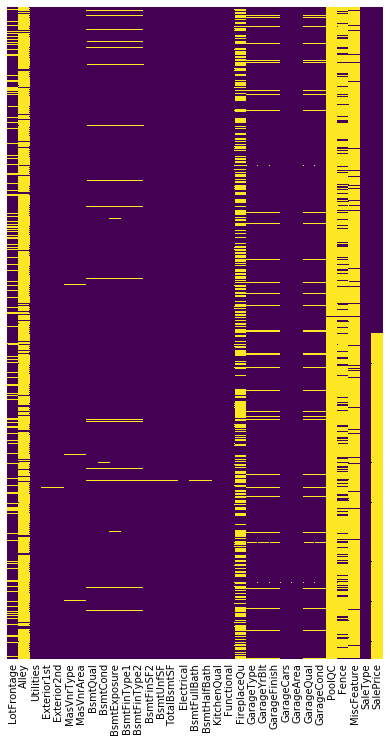

In [187]:
ames_missing = ames[['LotFrontage','Alley','Utilities','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Electrical', 'BsmtFullBath',
'BsmtHalfBath','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars',
'GarageArea','GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature', 'SaleType', 'SalePrice']]
f, ax = plt.subplots(figsize = (6,12))
sns.heatmap(ames_missing.isnull(), yticklabels = False, cbar = False, cmap="viridis")

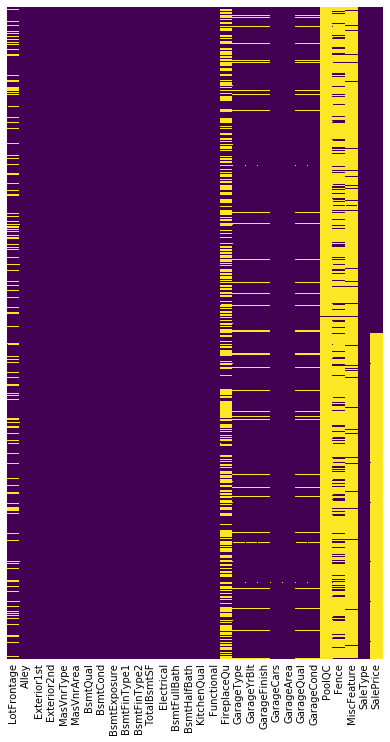

In [189]:
ames_missing1 = ames1[['LotFrontage','Alley','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','TotalBsmtSF','Electrical', 'BsmtFullBath',
'BsmtHalfBath','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars',
'GarageArea','GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature', 'SaleType', 'SalePrice']]
f, ax = plt.subplots(figsize = (6,12))
sns.heatmap(ames_missing1.isnull(), yticklabels = False, cbar = False, cmap="viridis")


### Seventh Group Of Columns

In [190]:
living_area = ['1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea']
living_area_features = ames1[living_area]
living_area_features

1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea
0          856       854             0       1710
1         1262         0             0       1262
2          920       866             0       1786
3          961       756             0       1717
4         1145      1053             0       2198
5          796       566             0       1362
6         1694         0             0       1694
7         1107       983             0       2090
8         1022       752             0       1774
9         1077         0             0       1077
10        1040         0             0       1040
11        1182      1142             0       2324
12         912         0             0        912
13        1494         0             0       1494
14        1253         0             0       1253
15         854         0             0        854
16        1004         0             0       1004
17        1296         0             0       1296
18        1114         0             0       1114
19        1339         0             0       1339
20        1158      1218             0       2376
21        1108         0             0       1108
22        1795         0             0       1795
23        1060         0             0       1060
24        1060         0             0       1060
25        1600         0             0       1600
26         900         0             0        900
27        1704         0             0       1704
28        1600         0             0       1600
29         520         0             0        520
30         649       668             0       1317
31        1228         0             0       1228
32        1234         0             0       1234
33        1700         0             0       1700
34        1561         0             0       1561
35        1132      1320             0       2452
36        1097         0             0       1097
37        1297         0             0       1297
38        1057         0             0       1057
39        1152         0             0       1152
40        1324         0             0       1324
41        1328         0             0       1328
42         884         0             0        884
43         938         0             0        938
44        1150         0             0       1150
45        1752         0             0       1752
46        1518       631             0       2149
47        1656         0             0       1656
48         736       716             0       1452
49         955         0             0        955
50         794       676             0       1470
51         816         0           360       1176
52         816         0             0        816
53        1842         0             0       1842
54        1360         0             0       1360
55        1425         0             0       1425
56         983       756             0       1739
57         860       860             0       1720
58        1426      1519             0       2945
59         780         0             0        780
60        1158         0             0       1158
61         581       530             0       1111
62        1370         0             0       1370
63         902       808             0       1710
64        1057       977             0       2034
65        1143      1330             0       2473
66        2207         0             0       2207
67        1479         0             0       1479
68         747         0             0        747
69        1304       983             0       2287
70        2223         0             0       2223
71         845         0             0        845
72         885       833             0       1718
73        1086         0             0       1086
74         840       765             0       1605
75         526       462             0        988
76         952         0             0        952
77        1072       213             0       1285
78        1768         0             0       1768
79    

The 'GrLivArea' feature is the sum of areas like '1stFlrSF', '2ndFlrSF' and 'LowQualFinSF'. Let's explore more features before dropping '1stFlrSF', '2ndFlrSF' and 'LowQualFinSF'.

In [191]:
# Drop '1stFlrSF','2ndFlrSF','LowQualFinSF'
ames1.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'], axis=1, inplace = True)

In [192]:
# Count missing values in GrLivArea
print(missing_values_table(living_area_features))
print('There are {} number of missing values in GrLivArea column'.format(living_area_features['GrLivArea'].isna().sum()))   

Your selected dataframe has 4 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []
There are 0 number of missing values in GrLivArea column


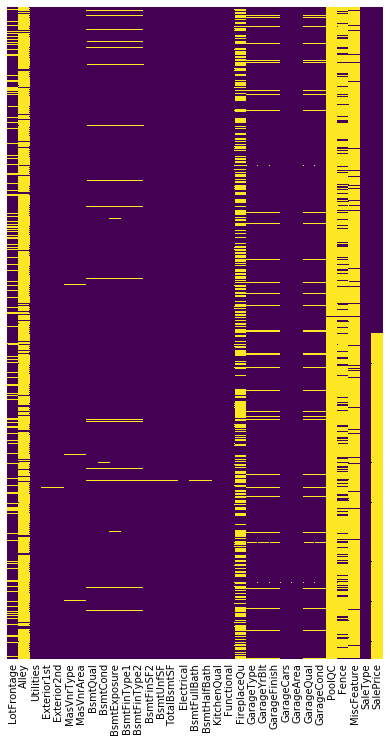

In [193]:
ames_missing = ames[['LotFrontage','Alley','Utilities','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Electrical', 'BsmtFullBath',
'BsmtHalfBath','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars',
'GarageArea','GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature', 'SaleType', 'SalePrice']]
f, ax = plt.subplots(figsize = (6,12))
sns.heatmap(ames_missing.isnull(), yticklabels = False, cbar = False, cmap="viridis")

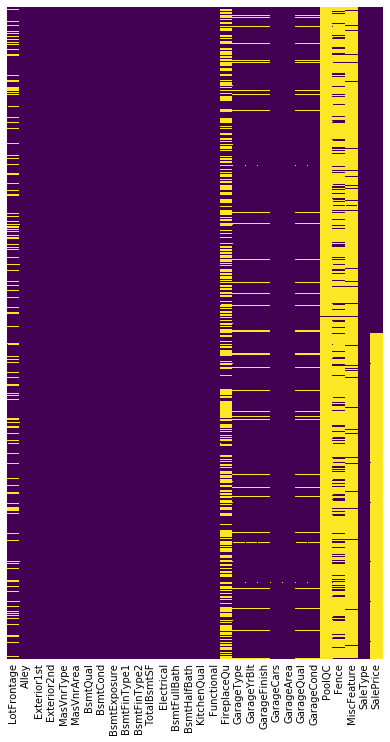

In [195]:
ames_missing1 = ames1[['LotFrontage','Alley','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','TotalBsmtSF','Electrical', 'BsmtFullBath',
'BsmtHalfBath','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars',
'GarageArea','GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature', 'SaleType', 'SalePrice']]
f, ax = plt.subplots(figsize = (6,12))
sns.heatmap(ames_missing1.isnull(), yticklabels = False, cbar = False, cmap="viridis")


### Eighth Group Of Columns

In [196]:
bathrooms = ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']
bathroom_features = ames1[bathrooms]
bathroom_features

BsmtFullBath  BsmtHalfBath  FullBath  HalfBath
0              1.0           0.0         2         1
1              0.0           1.0         2         0
2              1.0           0.0         2         1
3              1.0           0.0         1         0
4              1.0           0.0         2         1
5              1.0           0.0         1         1
6              1.0           0.0         2         0
7              1.0           0.0         2         1
8              0.0           0.0         2         0
9              1.0           0.0         1         0
10             1.0           0.0         1         0
11             1.0           0.0         3         0
12             1.0           0.0         1         0
13             0.0           0.0         2         0
14             1.0           0.0         1         1
15             0.0           0.0         1         0
16             1.0           0.0         1         0
17             0.0           0.0         2         0
18             1.0           0.0         1         1
19             0.0           0.0         1         0
20             0.0           0.0         3         1
21             0.0           0.0         1         0
22             0.0           0.0         2         0
23             1.0           0.0         1         0
24             1.0           0.0         1         0
25             0.0           0.0         2         0
26             0.0           1.0         1         0
27             1.0           0.0         2         0
28             1.0           0.0         1         0
29             0.0           0.0         1         0
30             0.0           0.0         1         0
31             0.0           0.0         1         1
32             0.0           0.0         2         0
33             0.0           1.0         1         1
34             1.0           0.0         2         0
35             0.0           0.0         3         1
36             0.0           0.0         1         1
37             0.0           1.0         1         0
38             1.0           0.0         1         0
39             0.0           0.0         2         0
40             0.0           0.0         2         0
41             0.0           1.0         1         1
42             1.0           0.0         1         0
43             1.0           0.0         1         0
44             1.0           0.0         1         0
45             1.0           0.0         2         0
46             1.0           0.0         1         1
47             0.0           0.0         2         0
48             0.0           0.0         2         0
49             1.0           0.0         1         0
50             0.0           1.0         2         0
51             0.0           0.0         1         0
52             1.0           0.0         1         0
53             2.0           0.0         0         1
54             0.0           0.0         1         0
55             0.0           0.0         2         0
56             1.0           0.0         2         1
57             0.0           0.0         2         1
58             0.0           0.0         3         1
59             0.0           0.0         1         0
60             1.0           0.0         1         1
61             0.0           0.0         1         0
62             0.0           0.0         2         0
63             0.0           0.0         2         0
64             1.0           0.0         2         1
65             0.0           0.0         2         1
66             1.0           0.0         2         0
67             1.0           0.0         2         0
68             0.0           0.0         1         0
69             0.0           0.0         2         0
70             1.0           0.0         2         0
71             1.0           0.0         1         0
72             0.0           0.0         2         1
73             1.0           0.0         1         0
74             0.0           0.

In [197]:
# Count the houses with missing information regarding bathrooms
print(missing_values_table(bathroom_features))

Your selected dataframe has 4 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


In [202]:
# We can combine these four columns to create new Feature called Bathrooms
# Before combining them we can multiply the half bathrooms with 0.5 and full bathrooms with 1
ames1['Bathrooms'] = ames1['BsmtHalfBath']* 0.5 + ames1['HalfBath']* 0.5 + ames1['BsmtFullBath'] + ames1['FullBath']

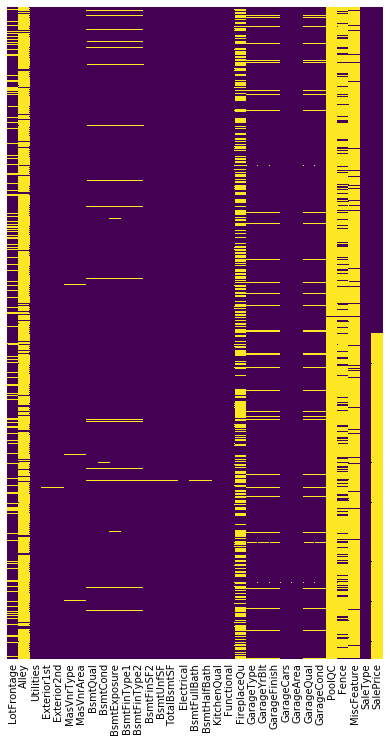

In [199]:
ames_missing = ames[['LotFrontage','Alley','Utilities','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Electrical', 'BsmtFullBath',
'BsmtHalfBath','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars',
'GarageArea','GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature', 'SaleType', 'SalePrice']]
f, ax = plt.subplots(figsize = (6,12))
sns.heatmap(ames_missing.isnull(), yticklabels = False, cbar = False, cmap="viridis")

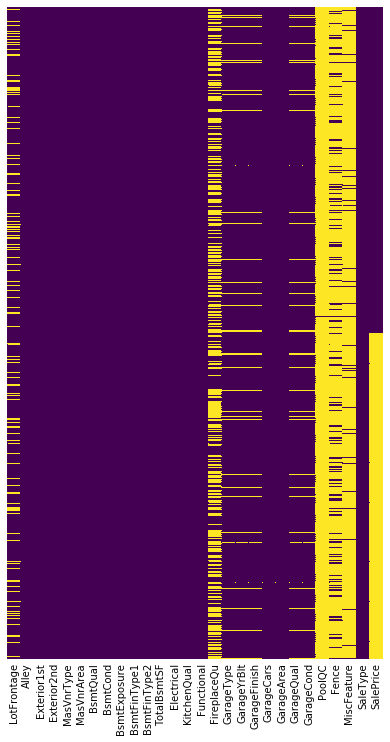

In [201]:
ames_missing1 = ames1[['LotFrontage','Alley','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','TotalBsmtSF','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars',
'GarageArea','GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature', 'SaleType', 'SalePrice']]
f, ax = plt.subplots(figsize = (6,12))
sns.heatmap(ames_missing1.isnull(), yticklabels = False, cbar = False, cmap="viridis")


In [203]:
ames1.drop(['BsmtHalfBath','HalfBath','BsmtFullBath','FullBath'], axis =1, inplace = True)

### Nineth Group Of Columns

In [204]:
bedrooms_rooms = ['BedroomAbvGr','TotRmsAbvGrd']
bedrooms_rooms_features = ames1[bedrooms_rooms] 
bedrooms_rooms_features

BedroomAbvGr  TotRmsAbvGrd
0                3             8
1                3             6
2                3             6
3                3             7
4                4             9
5                1             5
6                3             7
7                3             7
8                2             8
9                2             5
10               3             5
11               4            11
12               2             4
13               3             7
14               2             5
15               2             5
16               2             5
17               2             6
18               3             6
19               3             6
20               4             9
21               3             6
22               3             7
23               3             6
24               3             6
25               3             7
26               3             5
27               3             7
28               2             6
29               1             4
30               3             6
31               3             6
32               3             7
33               4             6
34               2             6
35               4             9
36               3             6
37               3             5
38               3             5
39               2             6
40               3             6
41               2             5
42               2             5
43               3             5
44               3             6
45               2             6
46               1             6
47               3             7
48               2             8
49               3             6
50               3             6
51               3             6
52               2             5
53               0             5
54               3             6
55               3             7
56               3             7
57               3             7
58               3            10
59               2             4
60               3             5
61               3             6
62               2             6
63               3             9
64               3             8
65               4             9
66               3             7
67               3             7
68               2             4
69               3             7
70               3             8
71               2             4
72               3             7
73               3             6
74               3             8
75               2             5
76               2             4
77               2             6
78               4             8
79               2             5
80               4             8
81               2             5
82               3             6
83               3             6
84               3             7
85               4             9
86               3             6
87               2             4
88               2             6
89               3             5
90               2             4
91               2             6
92               2             5
93               4             9
94               3             7
95               3             6
96               3             6
97               3             6
98               2             5
99               3             6
100              3             6
101              3             7
102              4             8
103              3             6
104              4             7
105              3             9
106              2             6
107              2             5
108              3             7
109              3             7
110              4             7
111              3             7
112              4            10
113              3             7
114              3             9
115              2             5
116              3             6
117              2             5
118              5            11
119              3             8
120          

In [205]:
# Count the houses with missing information regarding bathrooms
print (missing_values_table(bedrooms_rooms_features))

Your selected dataframe has 2 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


### Tenth Group Of Columns

In [207]:
kitchen = ['KitchenAbvGr','KitchenQual','Functional']
kitchen_features = ames1[kitchen]
kitchen_features

KitchenAbvGr KitchenQual Functional
0                1          Gd        Typ
1                1          TA        Typ
2                1          Gd        Typ
3                1          Gd        Typ
4                1          Gd        Typ
5                1          TA        Typ
6                1          Gd        Typ
7                1          TA        Typ
8                2          TA       Min1
9                2          TA        Typ
10               1          TA        Typ
11               1          Ex        Typ
12               1          TA        Typ
13               1          Gd        Typ
14               1          TA        Typ
15               1          TA        Typ
16               1          TA        Typ
17               2          TA        Typ
18               1          Gd        Typ
19               1          TA       Min1
20               1          Gd        Typ
21               1          Gd        Typ
22               1          Gd        Typ
23               1          TA        Typ
24               1          Gd        Typ
25               1          Gd        Typ
26               1          Gd        Typ
27               1          Gd        Typ
28               1          TA        Typ
29               1          Fa        Typ
30               1          TA        Typ
31               1          Gd        Typ
32               1          Gd        Typ
33               1          Gd        Typ
34               1          Ex        Typ
35               1          Gd        Typ
36               1          TA        Typ
37               1          TA        Typ
38               1          Gd        Typ
39               2          Fa        Typ
40               1          TA        Typ
41               1          TA        Typ
42               1          Gd        Typ
43               1          TA        Typ
44               1          TA        Typ
45               1          Ex        Typ
46               1          Gd        Typ
47               1          Gd        Typ
48               3          TA        Typ
49               1          TA        Typ
50               1          TA        Typ
51               1          TA        Typ
52               1          TA        Typ
53               1          Gd        Typ
54               1          TA       Min1
55               1          TA        Typ
56               1          Gd        Typ
57               1          Gd        Typ
58               1          Gd        Typ
59               1          TA        Typ
60               1          Gd        Typ
61               1          Fa        Typ
62               1          Gd        Typ
63               1          TA        Typ
64               1          Gd        Typ
65               1          Gd        Typ
66               1          TA       Min1
67               1          Gd        Typ
68               1          TA        Typ
69               1          TA        Typ
70               1          TA        Typ
71               1          TA        Typ
72               1          TA        Typ
73               1          TA        Typ
74               2          TA        Typ
75               1          TA        Typ
76               1          TA        Typ
77               1          TA       Min1
78               2          TA        Typ
79               1          TA        Typ
80               1          Gd        Typ
81               1          TA        Typ
82               1          Gd        Typ
83               1          TA        Typ
84               1          TA        Typ
85               1          Gd        Typ
86               1          Gd        Typ
87               1          Gd        Typ
88               1          Fa        Typ
89               1          TA        Typ
90               1          TA        Typ
91               1          TA        Typ
92               1          TA        Typ
93               2          TA        Typ
94              

In [208]:
# Count the houses with missing information regarding kitchens
# Explore the data more before dropping or imputing the missing value
print(missing_values_table(kitchen_features))

Your selected dataframe has 3 columns.
There are 2 columns that have missing values.
             Missing Values  % of Total Values
Functional                2                0.1
KitchenQual               1                0.0


In [244]:
# KitchenQual has 1 missing value. We can fill the value with the most frequent value
ames1['KitchenQual'] = ames1['KitchenQual'].fillna(ames1['KitchenQual'].mode()[0])

In [242]:
# Functional: Home functionality (Assume typical unless deductions are warranted)
# Hence we can fill the missing values with 'Typ'
ames1['Functional'].fillna('Typ', inplace=True)

In [246]:
kitchen = ['KitchenAbvGr','KitchenQual','Functional']
kitchen_features = ames1[kitchen]
kitchen_features
print(missing_values_table(kitchen_features))

Your selected dataframe has 3 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


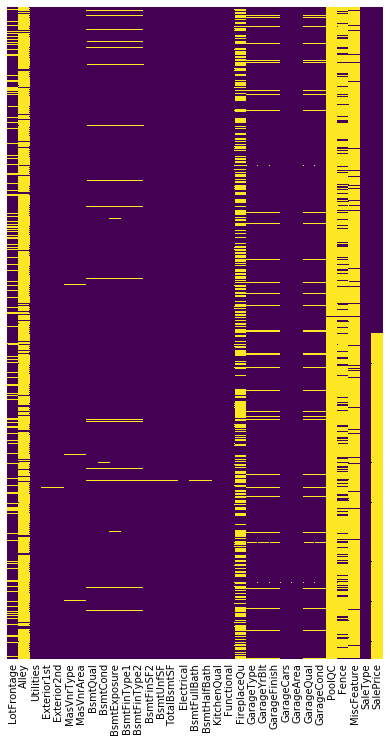

In [211]:
ames_missing = ames[['LotFrontage','Alley','Utilities','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Electrical', 'BsmtFullBath',
'BsmtHalfBath','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars',
'GarageArea','GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature', 'SaleType', 'SalePrice']]
f, ax = plt.subplots(figsize = (6,12))
sns.heatmap(ames_missing.isnull(), yticklabels = False, cbar = False, cmap="viridis")

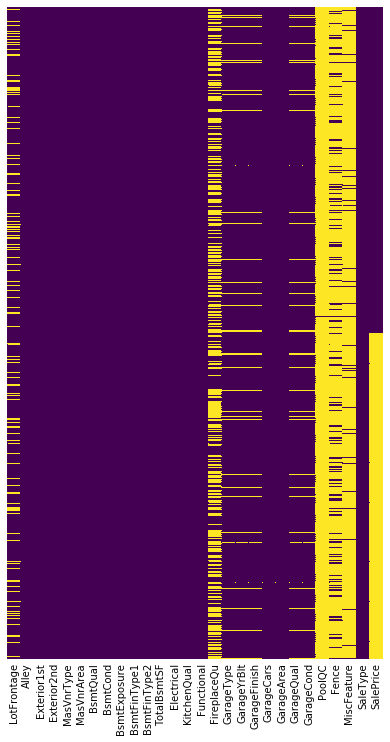

In [213]:
ames_missing1 = ames1[['LotFrontage','Alley','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','TotalBsmtSF','Electrical', 
'KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars',
'GarageArea','GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature', 'SaleType', 'SalePrice']]
f, ax = plt.subplots(figsize = (6,12))
sns.heatmap(ames_missing1.isnull(), yticklabels = False, cbar = False, cmap="viridis")


### Eleventh Group Of Columns

In [214]:
fireplaces = ['Fireplaces','FireplaceQu']
fireplace_features = ames1[fireplaces]
fireplace_features

Fireplaces FireplaceQu
0              0         NaN
1              1          TA
2              1          TA
3              1          Gd
4              1          TA
5              0         NaN
6              1          Gd
7              2          TA
8              2          TA
9              2          TA
10             0         NaN
11             2          Gd
12             0         NaN
13             1          Gd
14             1          Fa
15             0         NaN
16             1          TA
17             0         NaN
18             0         NaN
19             0         NaN
20             1          Gd
21             1          Gd
22             1          Gd
23             1          TA
24             1          TA
25             1          Gd
26             0         NaN
27             1          Gd
28             2          Gd
29             0         NaN
30             0         NaN
31             0         NaN
32             0         NaN
33             1          Gd
34             1          Gd
35             1          Gd
36             0         NaN
37             1          TA
38             0         NaN
39             0         NaN
40             1          TA
41             2          Gd
42             0         NaN
43             0         NaN
44             0         NaN
45             1          Gd
46             1          Ex
47             0         NaN
48             0         NaN
49             0         NaN
50             0         NaN
51             1          Gd
52             0         NaN
53             1          Gd
54             1          TA
55             1          Gd
56             0         NaN
57             0         NaN
58             1          Gd
59             0         NaN
60             0         NaN
61             0         NaN
62             1          Gd
63             0         NaN
64             0         NaN
65             1          Gd
66             1          Gd
67             0         NaN
68             0         NaN
69             1          TA
70             2          Gd
71             0         NaN
72             1          TA
73             0         NaN
74             0         NaN
75             0         NaN
76             0         NaN
77             0         NaN
78             0         NaN
79             0         NaN
80             1          Gd
81             0         NaN
82             1          Gd
83             0         NaN
84             1          TA
85             1          TA
86             1          Gd
87             0         NaN
88             0         NaN
89             0         NaN
90             0         NaN
91             0         NaN
92             0         NaN
93             1          Gd
94             0         NaN
95             1          TA
96             0         NaN
97             0         NaN
98             0         NaN
99             0         NaN
100            2          TA
101            1          TA
102            0         NaN
103            0         NaN
104            2          TA
105            1          Gd
106            0         NaN
107            0         NaN
108            0         NaN
109            1          TA
110            0         NaN
111            1          TA
112            1          Gd
113            2          Gd
114            1          TA
115            1          Fa
116            1          Po
117            0         NaN
118            2          TA
119            1          Gd
120            2          TA
121            0         NaN
122            0         NaN
123            0         NaN
124            1          TA
125            0         NaN
126            1          TA
127            1          TA
128            1          Fa
129            0         NaN
130            2          Gd
131            1          TA
132            0         NaN
133            0         NaN
134            1          TA
135            1          Gd
136            1          Fa
137 

In [215]:
print(missing_values_table(fireplace_features))

Your selected dataframe has 2 columns.
There are 1 columns that have missing values.
             Missing Values  % of Total Values
FireplaceQu            1420               48.6


In [216]:
# The NaN in FireplaceQu indicate that the fireplace is missing in the houses
fireplace_features[ames1['FireplaceQu'].isna()]
fireplace_features[fireplace_features['FireplaceQu'].isna()]
fireplace_features[fireplace_features['FireplaceQu'].isna()]['Fireplaces'].sum()

0

In [217]:
# We will replace the FireplaceQu with 'None'
ames1['FireplaceQu'].fillna('None', inplace = True)

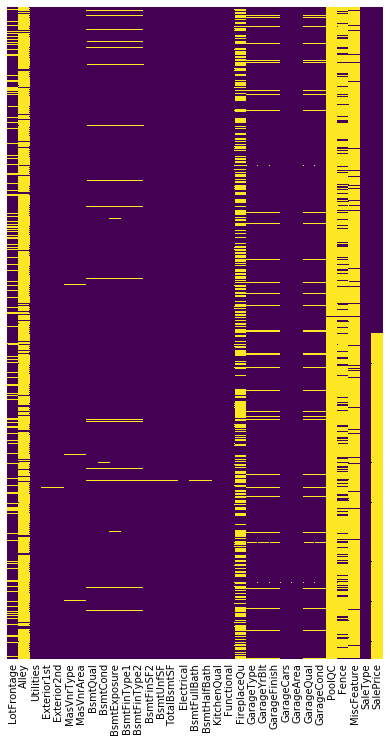

In [218]:
ames_missing = ames[['LotFrontage','Alley','Utilities','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Electrical', 'BsmtFullBath',
'BsmtHalfBath','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars',
'GarageArea','GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature', 'SaleType', 'SalePrice']]
f, ax = plt.subplots(figsize = (6,12))
sns.heatmap(ames_missing.isnull(), yticklabels = False, cbar = False, cmap="viridis")

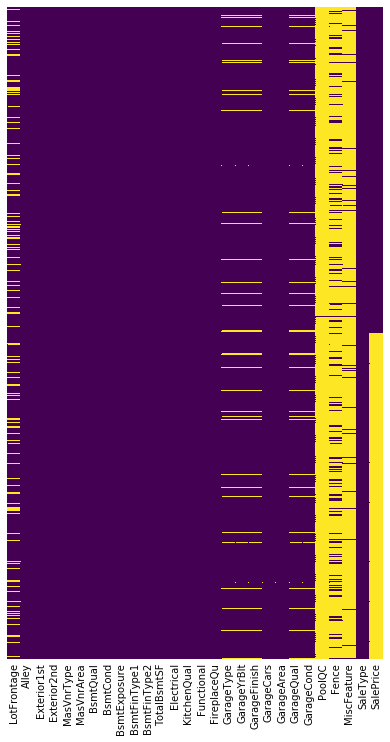

In [219]:
ames_missing1 = ames1[['LotFrontage','Alley','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','TotalBsmtSF','Electrical', 
'KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars',
'GarageArea','GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature', 'SaleType', 'SalePrice']]
f, ax = plt.subplots(figsize = (6,12))
sns.heatmap(ames_missing1.isnull(), yticklabels = False, cbar = False, cmap="viridis")


In [220]:
fireplaces = ['Fireplaces','FireplaceQu']
fireplace_features = ames1[fireplaces]
fireplace_features
print(missing_values_table(fireplace_features))

Your selected dataframe has 2 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


### Twelfth Group Of Columns

In [221]:
garage = ['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive']
garage_features = ames1[garage]
garage_features

GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive
0        Attchd       2003.0          RFn         2.0       548.0         TA         TA          Y
1        Attchd       1976.0          RFn         2.0       460.0         TA         TA          Y
2        Attchd       2001.0          RFn         2.0       608.0         TA         TA          Y
3        Detchd       1998.0          Unf         3.0       642.0         TA         TA          Y
4        Attchd       2000.0          RFn         3.0       836.0         TA         TA          Y
5        Attchd       1993.0          Unf         2.0       480.0         TA         TA          Y
6        Attchd       2004.0          RFn         2.0       636.0         TA         TA          Y
7        Attchd       1973.0          RFn         2.0       484.0         TA         TA          Y
8        Detchd       1931.0          Unf         2.0       468.0         Fa         TA          Y
9        Attchd       1939.0          RFn         1.0       205.0         Gd         TA          Y
10       Detchd       1965.0          Unf         1.0       384.0         TA         TA          Y
11      BuiltIn       2005.0          Fin         3.0       736.0         TA         TA          Y
12       Detchd       1962.0          Unf         1.0       352.0         TA         TA          Y
13       Attchd       2006.0          RFn         3.0       840.0         TA         TA          Y
14       Attchd       1960.0          RFn         1.0       352.0         TA         TA          Y
15       Detchd       1991.0          Unf         2.0       576.0         TA         TA          Y
16       Attchd       1970.0          Fin         2.0       480.0         TA         TA          Y
17      CarPort       1967.0          Unf         2.0       516.0         TA         TA          Y
18       Detchd       2004.0          Unf         2.0       576.0         TA         TA          Y
19       Attchd       1958.0          Unf         1.0       294.0         TA         TA          Y
20      BuiltIn       2005.0          RFn         3.0       853.0         TA         TA          Y
21       Attchd       1930.0          Unf         1.0       280.0         TA         TA          N
22       Attchd       2002.0          RFn         2.0       534.0         TA         TA          Y
23       Attchd       1976.0          Unf         2.0       572.0         TA         TA          Y
24       Attchd       1968.0          Unf         1.0       270.0         TA         TA          Y
25       Attchd       2007.0          RFn         3.0       890.0         TA         TA          Y
26       Detchd       2005.0          Unf         2.0       576.0         TA         TA          Y
27       Attchd       2008.0          RFn         3.0       772.0         TA         TA          Y
28       Attchd       1957.0          RFn         1.0       319.0         TA         TA          Y
29       Detchd       1920.0          Unf         1.0       240.0         Fa         TA          Y
30       Detchd       1920.0          Unf         1.0       250.0         TA         Fa          N
31       Attchd       1966.0          Unf         1.0       271.0         TA         TA          Y
32       Attchd       2007.0          RFn         2.0       484.0         TA         TA          Y
33       Attchd       1959.0          RFn         2.0       447.0         TA         TA          Y
34       Attchd       2005.0          Fin         2.0       556.0         TA         TA          Y
35      BuiltIn       2004.0          Fin         3.0       691.0         TA         TA          Y
36       Attchd       1995.0          Unf         2.0       672.0         TA         TA          Y
37       Attchd       1954.0          Fin         2.0       498.0         TA         TA          Y
38       Detchd       1953.0          Unf         1.0       246.0         TA         TA          Y
39          NaN          NaN          NaN    

In [222]:
print(missing_values_table(garage_features))

Your selected dataframe has 8 columns.
There are 7 columns that have missing values.
              Missing Values  % of Total Values
GarageYrBlt              159                5.4
GarageFinish             159                5.4
GarageQual               159                5.4
GarageCond               159                5.4
GarageType               157                5.4
GarageCars                 1                0.0
GarageArea                 1                0.0


In [223]:
# columns with attributes like'GarageQual','GarageCond','GarageFinish','GarageType' marked as NaN indicate the absence of these features.
garage_attributes_na = ['GarageQual','GarageCond','GarageFinish','GarageType']
for col in garage_attributes_na:
    ames1[col].fillna('None', inplace = True)

In [224]:
#Similarly for Garage Cars-- fill with 0; cause if no garage, no cars can parked in it
ames1['GarageCars'].fillna(0,inplace=True)   
# doing the same for GarageArea
ames1['GarageArea'].fillna(0,inplace=True)

ames1.drop('GarageYrBlt', axis = 1, inplace = True)

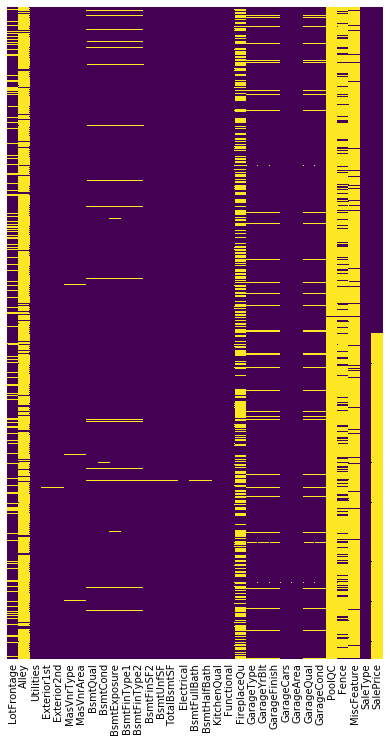

In [225]:
ames_missing = ames[['LotFrontage','Alley','Utilities','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Electrical', 'BsmtFullBath',
'BsmtHalfBath','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars',
'GarageArea','GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature', 'SaleType', 'SalePrice']]
f, ax = plt.subplots(figsize = (6,12))
sns.heatmap(ames_missing.isnull(), yticklabels = False, cbar = False, cmap="viridis")

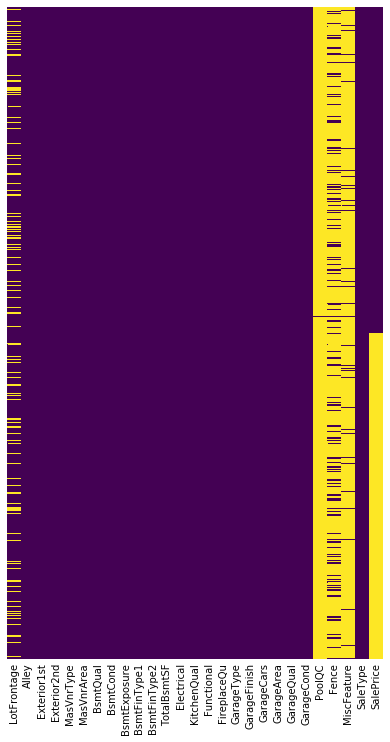

In [227]:
ames_missing1 = ames1[['LotFrontage','Alley','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','TotalBsmtSF','Electrical', 
'KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageCars',
'GarageArea','GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature', 'SaleType', 'SalePrice']]
f, ax = plt.subplots(figsize = (6,12))
sns.heatmap(ames_missing1.isnull(), yticklabels = False, cbar = False, cmap="viridis")


### Thirteenth Group Of Columns

In [228]:
porch = ['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']
porch_features = ames1[porch]
porch_features

WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch
0              0           61              0          0            0
1            298            0              0          0            0
2              0           42              0          0            0
3              0           35            272          0            0
4            192           84              0          0            0
5             40           30              0        320            0
6            255           57              0          0            0
7            235          204            228          0            0
8             90            0            205          0            0
9              0            4              0          0            0
10             0            0              0          0            0
11           147           21              0          0            0
12           140            0              0          0          176
13           160           33              0          0            0
14             0          213            176          0            0
15            48          112              0          0            0
16             0            0              0          0            0
17             0            0              0          0            0
18             0          102              0          0            0
19             0            0              0          0            0
20           240          154              0          0            0
21             0            0            205          0            0
22           171          159              0          0            0
23           100          110              0          0            0
24           406           90              0          0            0
25             0           56              0          0            0
26           222           32              0          0            0
27             0           50              0          0            0
28           288          258              0          0            0
29            49            0             87          0            0
30             0           54            172          0            0
31             0           65              0          0            0
32             0           30              0          0            0
33             0           38              0          0            0
34           203           47              0          0            0
35           113           32              0          0            0
36           392           64              0          0            0
37             0            0              0          0            0
38             0           52              0          0            0
39             0            0              0          0            0
40             0          138              0          0            0
41             0          104              0          0            0
42           240            0              0          0            0
43           145            0              0          0            0
44             0            0              0          0            0
45           196           82              0          0            0
46           168           43              0          0          198
47             0          146              0          0            0
48             0            0            102          0            0
49             0            0              0          0            0
50             0           75              0          0            0
51           112            0              0          0            0
52           106            0              0          0            0
53           857           72              0          0            0
54             0           50              0          0            0
55             0            0              0        407            0
56           115            0              0          0            0
57  

In [229]:
print(missing_values_table(porch_features))

Your selected dataframe has 5 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


### Fourteenth Group Of Columns

In [230]:
pool = ['PoolArea','PoolQC']
pool_features = ames1[pool]
pool_features

PoolArea PoolQC
0            0    NaN
1            0    NaN
2            0    NaN
3            0    NaN
4            0    NaN
5            0    NaN
6            0    NaN
7            0    NaN
8            0    NaN
9            0    NaN
10           0    NaN
11           0    NaN
12           0    NaN
13           0    NaN
14           0    NaN
15           0    NaN
16           0    NaN
17           0    NaN
18           0    NaN
19           0    NaN
20           0    NaN
21           0    NaN
22           0    NaN
23           0    NaN
24           0    NaN
25           0    NaN
26           0    NaN
27           0    NaN
28           0    NaN
29           0    NaN
30           0    NaN
31           0    NaN
32           0    NaN
33           0    NaN
34           0    NaN
35           0    NaN
36           0    NaN
37           0    NaN
38           0    NaN
39           0    NaN
40           0    NaN
41           0    NaN
42           0    NaN
43           0    NaN
44           0    NaN
45           0    NaN
46           0    NaN
47           0    NaN
48           0    NaN
49           0    NaN
50           0    NaN
51           0    NaN
52           0    NaN
53           0    NaN
54           0    NaN
55           0    NaN
56           0    NaN
57           0    NaN
58           0    NaN
59           0    NaN
60           0    NaN
61           0    NaN
62           0    NaN
63           0    NaN
64           0    NaN
65           0    NaN
66           0    NaN
67           0    NaN
68           0    NaN
69           0    NaN
70           0    NaN
71           0    NaN
72           0    NaN
73           0    NaN
74           0    NaN
75           0    NaN
76           0    NaN
77           0    NaN
78           0    NaN
79           0    NaN
80           0    NaN
81           0    NaN
82           0    NaN
83           0    NaN
84           0    NaN
85           0    NaN
86           0    NaN
87           0    NaN
88           0    NaN
89           0    NaN
90           0    NaN
91           0    NaN
92           0    NaN
93           0    NaN
94           0    NaN
95           0    NaN
96           0    NaN
97           0    NaN
98           0    NaN
99           0    NaN
100          0    NaN
101          0    NaN
102          0    NaN
103          0    NaN
104          0    NaN
105          0    NaN
106          0    NaN
107          0    NaN
108          0    NaN
109          0    NaN
110          0    NaN
111          0    NaN
112          0    NaN
113          0    NaN
114          0    NaN
115          0    NaN
116          0    NaN
117          0    NaN
118          0    NaN
119          0    NaN
120          0    NaN
121          0    NaN
122          0    NaN
123          0    NaN
124          0    NaN
125          0    NaN
126          0    NaN
127          0    NaN
128          0    NaN
129          0    NaN
130          0    NaN
131          0    NaN
132          0    NaN
133          0    NaN
134          0    NaN
135          0    NaN
136          0    NaN
137          0    NaN
138          0    NaN
139          0    NaN
140          0    NaN
141          0    NaN
142          0    NaN
143          0    NaN
144          0    NaN
145          0    NaN
146          0    NaN
147          0    NaN
148          0    NaN
149          0    NaN
150          0    NaN
151          0    NaN
152          0    NaN
153          0    NaN
154          0    NaN
155          0    NaN
156          0    NaN
157          0    NaN
158          0    NaN
159          0    NaN
160          0    NaN
161          0    NaN
162          0    NaN
163          0    NaN
164          0    NaN
165          0    NaN
166          0    NaN
167          0    NaN
168          0    NaN
169          0    NaN
170          0    NaN
171          0    NaN
172          0    NaN
173          0    NaN
174          0    NaN
175          0    NaN
176          0    NaN
177          0    NaN
178          0    NaN
179          0    NaN
180          0    NaN
18

In [231]:
print(missing_values_table(pool_features))

Your selected dataframe has 2 columns.
There are 1 columns that have missing values.
        Missing Values  % of Total Values
PoolQC            2909               99.7


In [232]:
# column PoolQC marked as NaN indicate the absence of the features.
ames1['PoolQC'].fillna('None',inplace=True)

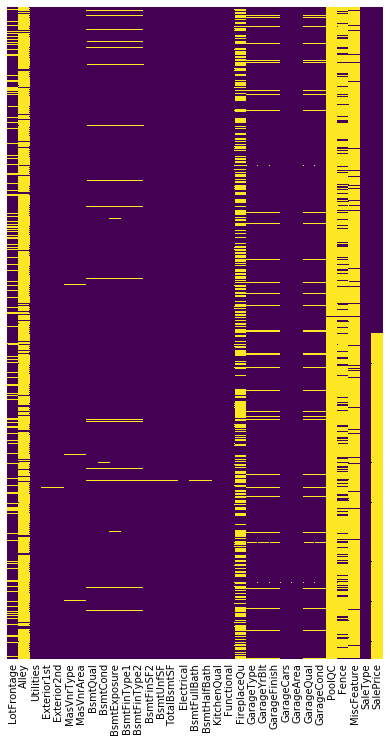

In [233]:
ames_missing = ames[['LotFrontage','Alley','Utilities','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Electrical', 'BsmtFullBath',
'BsmtHalfBath','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars',
'GarageArea','GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature', 'SaleType', 'SalePrice']]
f, ax = plt.subplots(figsize = (6,12))
sns.heatmap(ames_missing.isnull(), yticklabels = False, cbar = False, cmap="viridis")

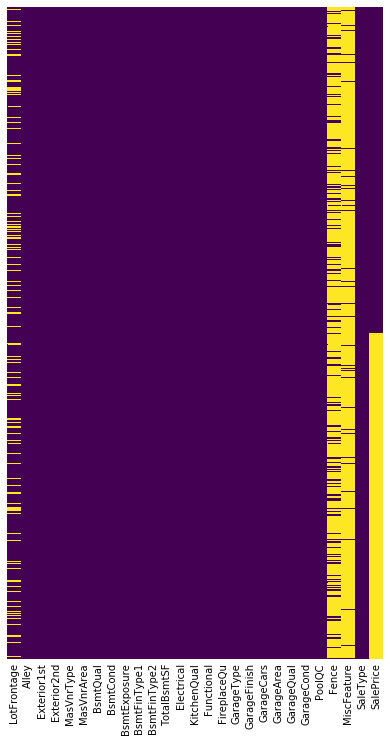

In [234]:
ames_missing1 = ames1[['LotFrontage','Alley','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','TotalBsmtSF','Electrical', 
'KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageCars',
'GarageArea','GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature', 'SaleType', 'SalePrice']]
f, ax = plt.subplots(figsize = (6,12))
sns.heatmap(ames_missing1.isnull(), yticklabels = False, cbar = False, cmap="viridis")


### Fifteenth Group Of Columns

In [235]:
miscellanous = ['Fence','MiscFeature','MiscVal']
miscellanous_features = ames1[miscellanous]
miscellanous_features

Fence MiscFeature  MiscVal
0       NaN         NaN        0
1       NaN         NaN        0
2       NaN         NaN        0
3       NaN         NaN        0
4       NaN         NaN        0
5     MnPrv        Shed      700
6       NaN         NaN        0
7       NaN        Shed      350
8       NaN         NaN        0
9       NaN         NaN        0
10      NaN         NaN        0
11      NaN         NaN        0
12      NaN         NaN        0
13      NaN         NaN        0
14     GdWo         NaN        0
15    GdPrv         NaN        0
16      NaN        Shed      700
17      NaN        Shed      500
18      NaN         NaN        0
19    MnPrv         NaN        0
20      NaN         NaN        0
21    GdPrv         NaN        0
22      NaN         NaN        0
23      NaN         NaN        0
24    MnPrv         NaN        0
25      NaN         NaN        0
26      NaN         NaN        0
27      NaN         NaN        0
28      NaN         NaN        0
29      NaN         NaN        0
30    MnPrv         NaN        0
31    MnPrv         NaN        0
32      NaN         NaN        0
33      NaN         NaN        0
34      NaN         NaN        0
35      NaN         NaN        0
36      NaN         NaN        0
37      NaN         NaN        0
38      NaN         NaN        0
39      NaN         NaN        0
40     GdWo         NaN        0
41      NaN         NaN        0
42    MnPrv         NaN        0
43    MnPrv         NaN        0
44      NaN         NaN        0
45      NaN         NaN        0
46      NaN         NaN        0
47      NaN         NaN        0
48      NaN         NaN        0
49    MnPrv         NaN        0
50      NaN         NaN        0
51    MnPrv        Shed      400
52      NaN         NaN        0
53      NaN         NaN        0
54    MnPrv         NaN        0
55      NaN         NaN        0
56      NaN         NaN        0
57      NaN         NaN        0
58      NaN         NaN        0
59    MnPrv         NaN        0
60      NaN         NaN        0
61      NaN         NaN        0
62      NaN         NaN        0
63    GdPrv         NaN        0
64    GdPrv         NaN        0
65      NaN         NaN        0
66      NaN         NaN        0
67      NaN         NaN        0
68      NaN         NaN        0
69      NaN         NaN        0
70      NaN         NaN        0
71      NaN         NaN        0
72      NaN         NaN        0
73     GdWo         NaN        0
74      NaN         NaN        0
75     GdWo         NaN        0
76      NaN         NaN        0
77    MnPrv         NaN        0
78      NaN         NaN        0
79    MnPrv         NaN        0
80      NaN         NaN        0
81      NaN         NaN        0
82      NaN         NaN        0
83      NaN         NaN        0
84      NaN        Shed      700
85      NaN         NaN        0
86      NaN         NaN        0
87      NaN         NaN        0
88    MnPrv         NaN        0
89      NaN         NaN        0
90      NaN         NaN        0
91     GdWo         NaN        0
92      NaN         NaN        0
93      NaN         NaN        0
94      NaN         NaN        0
95      NaN        Shed      480
96      NaN         NaN        0
97      NaN         NaN        0
98      NaN        Shed      400
99      NaN        Shed      400
100     NaN         NaN        0
101     NaN         NaN        0
102     NaN         NaN        0
103     NaN         NaN        0
104     NaN         NaN        0
105     NaN         NaN        0
106     NaN        Shed      450
107     NaN         NaN        0
108     NaN         NaN        0
109   MnPrv         NaN        0
110     NaN         NaN        0
111     NaN         NaN        0
112     NaN         NaN        0
113   MnPrv         NaN        0
114   MnPrv         NaN        0
115     NaN         NaN        0
116     NaN         NaN        0
117     NaN         NaN        0
118     NaN         NaN        0
119     NaN         NaN        0
120     NaN  

In [236]:
print (missing_values_table(miscellanous_features))

Your selected dataframe has 3 columns.
There are 2 columns that have missing values.
             Missing Values  % of Total Values
MiscFeature            2814               96.4
Fence                  2348               80.4


In [237]:
# column Fence and MiscFeature marked as NaN indicate the absence of these features.
ames1['Fence'].fillna('None',inplace=True)
ames1['MiscFeature'].fillna('None',inplace=True)

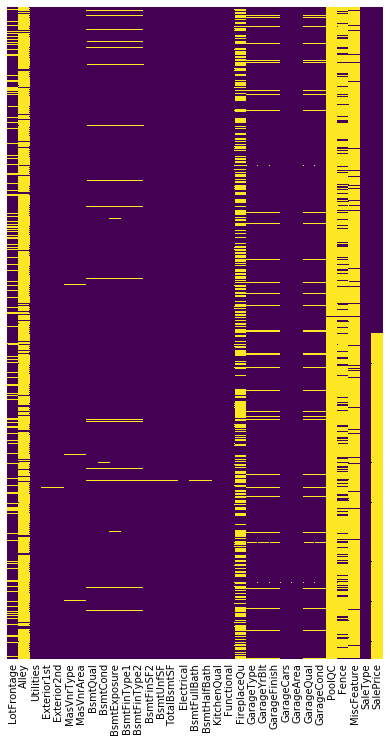

In [238]:
ames_missing = ames[['LotFrontage','Alley','Utilities','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Electrical', 'BsmtFullBath',
'BsmtHalfBath','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars',
'GarageArea','GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature', 'SaleType', 'SalePrice']]
f, ax = plt.subplots(figsize = (6,12))
sns.heatmap(ames_missing.isnull(), yticklabels = False, cbar = False, cmap="viridis")

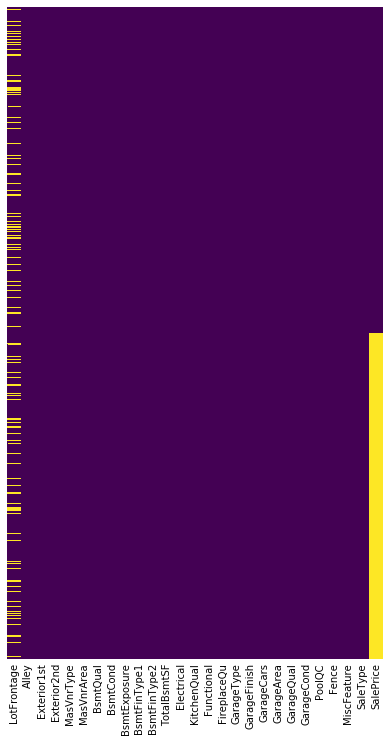

In [239]:
ames_missing1 = ames1[['LotFrontage','Alley','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','TotalBsmtSF','Electrical', 
'KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageCars',
'GarageArea','GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature', 'SaleType', 'SalePrice']]
f, ax = plt.subplots(figsize = (6,12))
sns.heatmap(ames_missing1.isnull(), yticklabels = False, cbar = False, cmap="viridis")


### Sixteenth Group Of Columns

In [248]:
sale = ['MoSold','YrSold','SaleType','SaleCondition','SalePrice']
sale_features = ames1[sale]
sale_features

MoSold  YrSold SaleType SaleCondition  SalePrice
0          2    2008       WD        Normal   208500.0
1          5    2007       WD        Normal   181500.0
2          9    2008       WD        Normal   223500.0
3          2    2006       WD       Abnorml   140000.0
4         12    2008       WD        Normal   250000.0
5         10    2009       WD        Normal   143000.0
6          8    2007       WD        Normal   307000.0
7         11    2009       WD        Normal   200000.0
8          4    2008       WD       Abnorml   129900.0
9          1    2008       WD        Normal   118000.0
10         2    2008       WD        Normal   129500.0
11         7    2006      New       Partial   345000.0
12         9    2008       WD        Normal   144000.0
13         8    2007      New       Partial   279500.0
14         5    2008       WD        Normal   157000.0
15         7    2007       WD        Normal   132000.0
16         3    2010       WD        Normal   149000.0
17        10    2006       WD        Normal    90000.0
18         6    2008       WD        Normal   159000.0
19         5    2009      COD       Abnorml   139000.0
20        11    2006      New       Partial   325300.0
21         6    2007       WD        Normal   139400.0
22         9    2008       WD        Normal   230000.0
23         6    2007       WD        Normal   129900.0
24         5    2010       WD        Normal   154000.0
25         7    2009       WD        Normal   256300.0
26         5    2010       WD        Normal   134800.0
27         5    2010       WD        Normal   306000.0
28        12    2006       WD        Normal   207500.0
29         5    2008       WD        Normal    68500.0
30         7    2008       WD        Normal    40000.0
31         6    2008       WD        Normal   149350.0
32         1    2008       WD        Normal   179900.0
33         4    2010       WD        Normal   165500.0
34         8    2007       WD        Normal   277500.0
35         9    2006       WD        Normal   309000.0
36         6    2009       WD        Normal   145000.0
37        10    2009       WD        Normal   153000.0
38         1    2010       WD       Abnorml   109000.0
39         6    2008       WD       AdjLand    82000.0
40        12    2006       WD       Abnorml   160000.0
41         7    2007       WD        Normal   170000.0
42        12    2007       WD        Normal   144000.0
43         7    2008       WD        Normal   130250.0
44         5    2006       WD        Normal   141000.0
45         2    2010       WD        Normal   319900.0
46         8    2009       WD       Abnorml   239686.0
47         7    2007       WD        Normal   249700.0
48         6    2009      New       Partial   113000.0
49         1    2007       WD        Normal   127000.0
50         7    2007       WD        Normal   177000.0
51         9    2006       WD        Normal   114500.0
52         5    2010       WD        Normal   110000.0
53        11    2006       WD        Normal   385000.0
54         2    2007       WD        Normal   130000.0
55         7    2008       WD        Normal   180500.0
56         8    2009       WD       Abnorml   172500.0
57         8    2006       WD        Normal   196500.0
58        10    2006      New       Partial   438780.0
59         1    2008       WD        Normal   124900.0
60         5    2006      New       Partial   158000.0
61         3    2007       WD        Normal   101000.0
62        10    2007       WD        Normal   202500.0
63         4    2010       WD        Normal   140000.0
64         2    2009       WD        Normal   219500.0
65        10    2007       WD        Normal   317000.0
66         7    2010       WD        Normal   180000.0
67         6    2007       WD        Normal   226000.0
68         6    2010       WD        Normal    80000.0
69         7    2006       WD        Normal   225000.0
70         2    2007       WD        Normal   244000.0
71         6    2007       WD        Normal   

In [249]:
print(missing_values_table(sale_features))

Your selected dataframe has 5 columns.
There are 2 columns that have missing values.
           Missing Values  % of Total Values
SalePrice            1459               50.0
SaleType                1                0.0


In [250]:
ames1["SaleType"] = ames1['SaleType'].fillna(ames1['SaleType'].mode()[0])

In [251]:
sale_features.isnull().sum()

MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
dtype: int64

In [253]:
sale_features = ames1[sale]
print(missing_values_table(sale_features))

Your selected dataframe has 5 columns.
There are 1 columns that have missing values.
           Missing Values  % of Total Values
SalePrice            1459               50.0


In [254]:
print(missing_values_table(ames1))

Your selected dataframe has 69 columns.
There are 2 columns that have missing values.
             Missing Values  % of Total Values
SalePrice              1459               50.0
LotFrontage             486               16.6


In [274]:
ames1.sample(15)
ames1.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition',
 'SalePrice',
 'HouseAge',
 'Bathrooms']

## Imputing Missing Values in LotFrontageArea

In [258]:
#### fancyimpute needs a numpay array. I hence converted the df_numeric to a an array using as_matrix().
# ames1 is my data frame with the missings. I keep only floats
ames1_numeric = ames1.select_dtypes(include=[np.float, np.int64])#.as_matrix()
cols = ames1_numeric.columns.tolist()
ames1_numeric_matrix = ames1.select_dtypes(include=[np.float, np.int64]).as_matrix()
# I now run fancyimpute KNN, 
# it returns a np.array which I store as a pandas dataframe
ames1_filled = pd.DataFrame(KNN(k=3).fit_transform(ames1_numeric_matrix), columns= cols)

Imputing row 1/2919 with 0 missing, elapsed time: 1.661
Imputing row 101/2919 with 1 missing, elapsed time: 1.662
Imputing row 201/2919 with 0 missing, elapsed time: 1.663
Imputing row 301/2919 with 0 missing, elapsed time: 1.664
Imputing row 401/2919 with 0 missing, elapsed time: 1.665
Imputing row 501/2919 with 0 missing, elapsed time: 1.666
Imputing row 601/2919 with 0 missing, elapsed time: 1.666
Imputing row 701/2919 with 0 missing, elapsed time: 1.667
Imputing row 801/2919 with 0 missing, elapsed time: 1.668
Imputing row 901/2919 with 1 missing, elapsed time: 1.669
Imputing row 1001/2919 with 0 missing, elapsed time: 1.670
Imputing row 1101/2919 with 0 missing, elapsed time: 1.671
Imputing row 1201/2919 with 0 missing, elapsed time: 1.672
Imputing row 1301/2919 with 1 missing, elapsed time: 1.673
Imputing row 1401/2919 with 0 missing, elapsed time: 1.674
Imputing row 1501/2919 with 2 missing, elapsed time: 1.676
Imputing row 1601/2919 with 1 missing, elapsed time: 1.680
Imputing 

In [261]:
ames2 = ames1_filled.copy()

In [267]:
ames1.drop('LotFrontage', axis = 1, inplace = True)

In [266]:
ames2[['LotFrontage']]

LotFrontage
0       65.000000
1       80.000000
2       68.000000
3       60.000000
4       84.000000
5       85.000000
6       75.000000
7       81.648065
8       51.000000
9       50.000000
10      70.000000
11      85.000000
12      56.553465
13      91.000000
14      73.411462
15      51.000000
16     100.262256
17      72.000000
18      66.000000
19      70.000000
20     101.000000
21      57.000000
22      75.000000
23      44.000000
24      59.418790
25     110.000000
26      60.000000
27      98.000000
28      47.000000
29      60.000000
30      50.000000
31      69.751849
32      85.000000
33      70.000000
34      60.000000
35     108.000000
36     112.000000
37      74.000000
38      68.000000
39      65.000000
40      84.000000
41     115.000000
42      80.480229
43      64.651542
44      70.000000
45      61.000000
46      48.000000
47      84.000000
48      33.000000
49      66.000000
50      67.887431
51      52.000000
52     110.000000
53      68.000000
54      60.000000
55     100.000000
56      24.000000
57      89.000000
58      66.000000
59      60.000000
60      63.000000
61      60.000000
62      44.000000
63      50.000000
64      71.441180
65      76.000000
66      87.475162
67      72.000000
68      47.000000
69      81.000000
70      95.000000
71      69.000000
72      74.000000
73      85.000000
74      60.000000
75      21.000000
76      69.791809
77      50.000000
78      72.000000
79      60.000000
80     100.000000
81      32.000000
82      78.000000
83      80.000000
84      67.561905
85     121.000000
86     122.000000
87      40.000000
88     105.000000
89      60.000000
90      60.000000
91      85.000000
92      80.000000
93      60.000000
94      69.000000
95      70.763511
96      78.000000
97      73.000000
98      85.000000
99      77.000000
100     80.051405
101     77.000000
102     64.000000
103     94.000000
104     67.854560
105     75.000000
106     60.000000
107     50.000000
108     85.000000
109    105.000000
110     75.000000
111     61.439808
112     77.000000
113     86.906627
114     61.000000
115     34.000000
116     74.843836
117     74.000000
118     90.000000
119     65.000000
120     94.105025
121     50.000000
122     75.000000
123     55.000000
124     48.000000
125     60.000000
126     50.874657
127     55.000000
128     69.000000
129     69.000000
130     88.000000
131     76.494535
132     75.000000
133     50.834593
134     78.000000
135     80.000000
136     82.887947
137     82.000000
138     73.000000
139     65.000000
140     70.000000
141     78.000000
142     71.000000
143     78.000000
144     70.000000
145     24.000000
146     51.000000
147     74.424467
148     63.000000
149     50.784290
150    120.000000
151    107.000000
152     73.626921
153     85.590389
154     84.000000
155     60.000000
156     60.000000
157     92.000000
158    100.000000
159    134.000000
160     73.642557
161    110.000000
162     95.000000
163     55.000000
164     40.000000
165     62.000000
166     89.271605
167     86.000000
168     62.000000
169    104.351051
170     78.560809
171    141.000000
172     44.000000
173     80.000000
174     47.000000
175     84.000000
176     97.000000
177     86.696321
178     63.000000
179     60.000000
180     23.027733
181     54.000000
182     60.000000
183     63.000000
184     92.000000
185     90.000000
186     84.655995
187     60.000000
188     64.000000
189     41.000000
190     70.000000
191     64.158860
192     68.000000
193     24.000000
194     60.000000
195     24.000000
196     79.000000
197    174.000000
198     92.000000
199     76.000000
200     80.000000
201     75.000000
202     50.000000
203     46.332673
204     50.000000
205     99.000000
206     40.000000
207     68.754340
208     78.120757
209     75.000000
210     67.000000
211     83.000000
212     72.000000
213     43.000000
214     63.931864
215     72.000000
216     65.000000
217     57.000000
218     71.254308
219     43.000000
220     73.000000
221     60

In [319]:
ames3 = pd.concat([ames1, ames2['LotFrontage']], axis=1)
ames3 = ames3[['Id','MSSubClass','MSZoning','LotFrontage','LotArea','Street','Alley','LotShape','LandContour',
               'LotConfig','LandSlope','Neighborhood', 'Condition1','Condition2','BldgType','HouseStyle',
               'OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
               'MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure',
               'BsmtFinType1','BsmtFinType2','TotalBsmtSF','Heating','HeatingQC','CentralAir','Electrical',
               'GrLivArea','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces',
               'FireplaceQu','GarageType','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond',
               'PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
               'PoolQC','Fence','MiscFeature','MiscVal','MoSold','YrSold','SaleType','SaleCondition','SalePrice',
               'HouseAge','Bathrooms']]
ames3.sample(15)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  TotalBsmtSF Heating HeatingQC CentralAir Electrical  GrLivArea  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  HouseAge  Bathrooms
805    806          20       RL    91.000000    12274   Pave  None      IR1         Lvl       FR2       Gtl      Somerst       Norm       Norm     1Fam     1Story            7            5     Gable  CompShg     VinylSd     VinylSd      Stone       256.0        Gd        TA      PConc       Gd       TA           No          Unf          Unf       1417.0    GasA        Ex          Y      SBrkr       1428             3             1          Ex             6        Typ           0        None     Attchd          RFn         2.0       554.0         TA         TA          Y           0           60              0          0            0         0   None   None        None        0       7    2008      New       Partial   227680.0        10        2.0
2136  2137          20       RL    82.000000     9488   Pave  None      Reg         Lvl    Inside       Gtl       Sawyer      Feedr       Norm     1Fam     1Story            5            6     Gable  CompShg     VinylSd     VinylSd       None         0.0        Gd        TA     CBlock       TA       TA           No          Unf          Unf       1046.0    GasA        Gd          N      SBrkr       1054             3             1          TA             6        Typ           0        None     Detchd          Unf         1.0       240.0         TA         TA          Y           0           60            122          0            0         0   None   None        None        0       9    2008       WD       Abnorml        NaN        71        1.0
977    978         120       FV    35.000000     4274   Pave  Pave      IR1         Lvl    Inside       Gtl      Somerst       Norm       Norm   TwnhsE     1Story            7            5     Gable  CompShg     VinylSd     VinylSd       None         0.0        Gd        TA      PConc       Gd       TA           No          GLQ          Unf       1241.0    GasA        Ex          Y      SBrkr       1241             1             1          Gd             4        Typ           0        None     Attchd          Fin         2.0       569.0         TA         TA          Y           0          116              0          0            0         0   None   None        None        0      11    2007      New       Partial   199900.0        12        2.5
2688  2689          20       FV    72.000000     8640   Pave  None      Reg         Lvl    Inside       Gtl      Somerst       Norm       Norm     1Fam     1Story            8            5     Gable  CompShg     VinylSd     VinylSd       None         0.0        Gd        TA      PConc       Gd       TA           No          GLQ          Unf       1278.0    GasA        Ex          Y      SBrkr       1278             2             1          Gd             5        Typ           0        None     Attchd          RFn         2.0       584.0         TA         TA          Y           0           60              0          0            0         0   None   None        None        0      10    2006      New       Partial        NaN        12        2.0
211    212          20       RL    83.000000    10420   Pave  None      Reg         Lvl    Corner       Gtl      Edwards       Norm       Norm     1Fam     1Story            6            5     Gable  CompShg     VinylSd    

In [322]:
ames3.to_csv('ames4.csv', index = False)

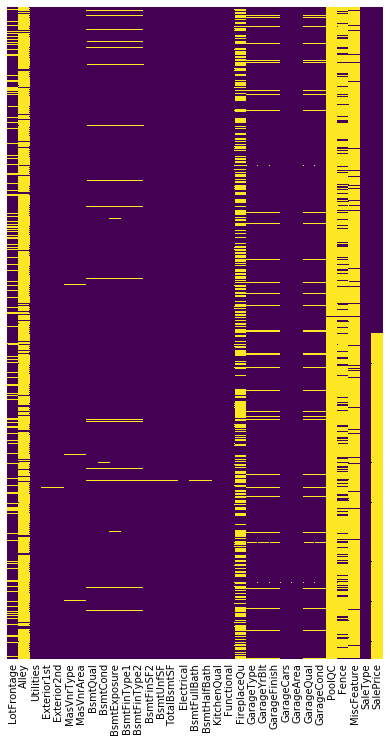

In [259]:
ames_missing = ames[['LotFrontage','Alley','Utilities','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Electrical', 'BsmtFullBath',
'BsmtHalfBath','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars',
'GarageArea','GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature', 'SaleType', 'SalePrice']]
f, ax = plt.subplots(figsize = (6,12))
sns.heatmap(ames_missing.isnull(), yticklabels = False, cbar = False, cmap="viridis")

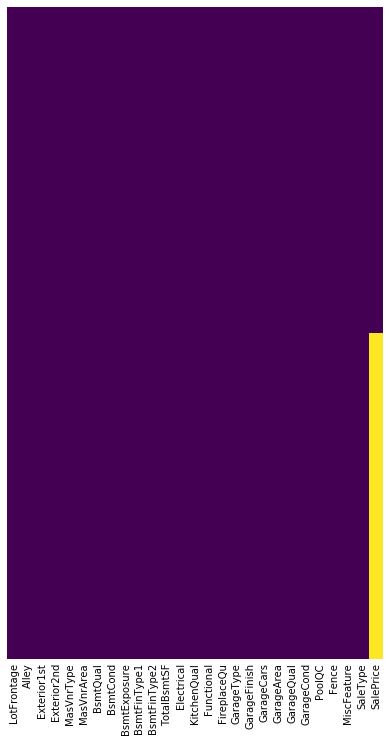

In [283]:
ames_missing3 = ames3[['LotFrontage','Alley','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','TotalBsmtSF','Electrical', 
'KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageCars',
'GarageArea','GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature', 'SaleType', 'SalePrice']]
f, ax = plt.subplots(figsize = (6,12))
sns.heatmap(ames_missing3.isnull(), yticklabels = False, cbar = False, cmap="viridis")


## Correlations between Features and Target

### Remove Collinear Features¶

In [2]:
#Load the data file cleaned so far
ames4 = pd.read_csv('ames4.csv')

In [4]:
# Check few random observations
ames4.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  TotalBsmtSF Heating HeatingQC CentralAir Electrical  GrLivArea  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  HouseAge  Bathrooms
856    857          80       RL    66.781246    10970   Pave  None      IR1         Low    Inside       Mod      CollgCr       Norm       Norm     1Fam       SLvl            6            6     Gable  CompShg     Plywood     HdBoard       None         0.0        TA        TA     CBlock       Gd       Gd           Gd          GLQ          LwQ        940.0    GasA        TA          Y      SBrkr       1026             3             1          TA             5        Typ           0        None     Detchd          Unf         2.0       576.0         TA         Fa          Y           0            0             34          0            0         0   None  MnPrv        None        0      10    2008       WD        Normal   147000.0        40        2.0
2566  2567         190       RL    79.000000     6221   Pave  None      IR1         Lvl    Inside       Gtl      Crawfor       Norm       Norm   2fmCon     1.5Fin            5            5     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA     CBlock       TA       Fa           No          LwQ          Unf        728.0    GasA        Ex          Y      SBrkr       1355             3             1          TA             5        Typ           0        None     Detchd          Unf         2.0       528.0         TA         TA          Y           0            0              0          0          144         0   None  MnPrv        None        0      10    2007       WD        Normal        NaN        77        2.0
1574  1575          20       RL    83.000000    11980   Pave  None      Reg         Low    Inside       Mod      SawyerW       Norm       Norm     1Fam     1Story            7            5     Gable  CompShg     Plywood     Plywood    BrkFace       177.0        Gd        TA     CBlock       Gd       TA           Gd          GLQ          Unf       1433.0    GasA        Ex          Y      SBrkr       1433             1             1          Gd             4        Typ           2          TA     Attchd          RFn         2.0       528.0         Gd         Gd          Y           0          278              0          0          266         0   None  MnPrv        None        0       6    2010       WD        Normal        NaN        31        2.5
744    745         120       RL    41.000000     5395   Pave  None      IR1         HLS    Inside       Gtl      StoneBr       Norm       Norm   TwnhsE     1Story            8            5     Gable  CompShg     HdBoard     HdBoard       None         0.0        Gd        TA      PConc       Gd       TA           No          GLQ          Unf       1337.0    GasA        Gd          Y      SBrkr       1337             2             1          Gd             5        Typ           1          TA     Attchd          RFn         2.0       462.0         TA         TA          Y          96            0             70        168            0         0   None   None        None        0      10    2008       WD        Normal   180000.0        25        3.0
2592  2593          20       RL    68.000000     8298   Pave  None      IR1         HLS    Inside       Gtl       Timber       Norm       Norm     1Fam     1Story            8            5       Hip  CompShg     VinylSd    

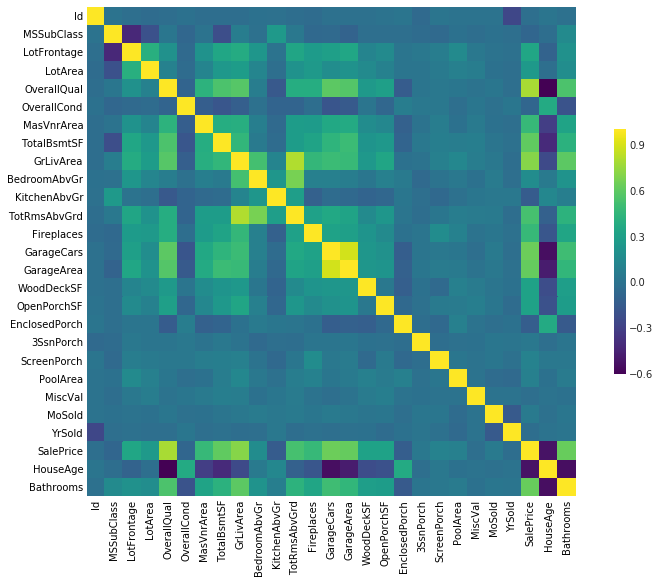

In [5]:
# Compute the correlation matrix
correlation_matrix = ames4.corr().round(2)
correlation_matrix
# sns.heatmap(data = correlation_matrix, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
with sns.axes_style("white"):
        sns.heatmap(correlation_matrix, cmap='viridis', vmax=1,xticklabels=True, yticklabels=True, 
            square=True, cbar_kws={"shrink": .5})

In [6]:
# Find all correlations and sort 
correlations_data = ames4.corr()['SalePrice'].sort_values()
correlations_data

HouseAge        -0.522897
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
Id              -0.021917
MiscVal         -0.021190
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
LotArea          0.263843
OpenPorchSF      0.315856
WoodDeckSF       0.324413
LotFrontage      0.349337
Fireplaces       0.466929
MasVnrArea       0.472614
TotRmsAbvGrd     0.533723
TotalBsmtSF      0.613581
GarageArea       0.623431
Bathrooms        0.631731
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

The next step is to remove highly collinear variables. Collinear features tend to increase model complexity and decrease model generalization. A small change in one of the collinear variables would also change the other collinear variable making it difficult to interpret the linear model.

If we look at the heatmap above, all yellow squares indicate high correlation between the corresponding variables

GarageCars’ and ‘GarageArea’ are highly correlated with each other and the 'SalePrice'. We can drop one of them. 'GarageCars' feature has a higher correlation with 'SalePrice' than 'GarageArea' (0.640409 vs 0.623431). We will drop 'GarageArea'.

Strong correlation is also seen between 'TotRmsAbvGrd' and 'GrLivArea'. 'GrLivArea' feature has a higher correlation with 'SalePrice' than 'TotRmsAbvGrd' (0.708624 vs 0.613581). We will drop 'TotRmsAbvGrd'.

In [7]:
ames4.drop(['GarageCars', 'TotRmsAbvGrd'], axis = 1, inplace= True)

In [8]:
correlation_matrix_2 = ames4.corr().round(2)

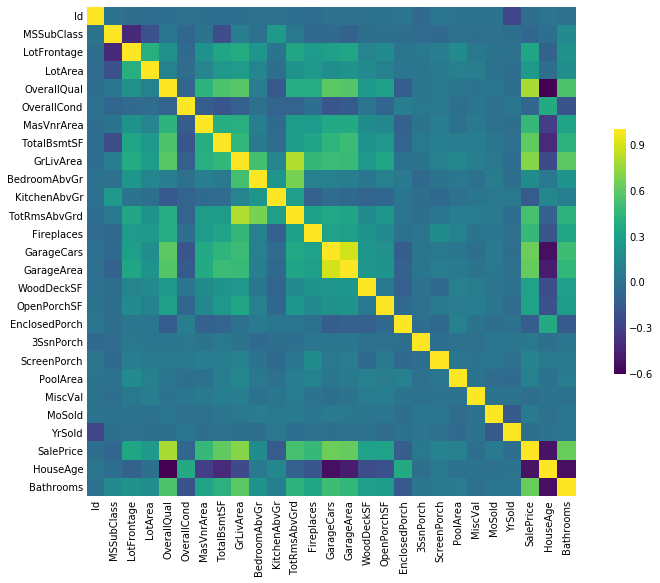

In [9]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation_matrix, cmap='viridis', vmax=1,xticklabels=True, yticklabels=True, 
            square=True, cbar_kws={"shrink": .5})

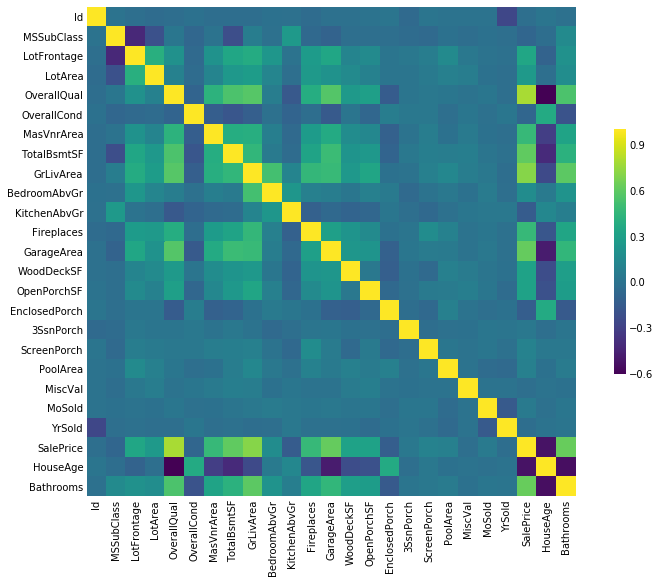

In [10]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation_matrix_2, cmap='viridis', vmax=1,xticklabels=True, yticklabels=True, 
            square=True, cbar_kws={"shrink": .5})

### Separate the train and test data before further data cleaning

In [11]:
# Separate the train and the test data
train_data = ames4.iloc[:1460,:]
test_data = ames4.iloc[1460:, :]

In [12]:
train_data.shape

(1460, 67)

In [13]:
train_data.to_csv('train_data.csv', index = False)

In [14]:
test_data.shape

(1459, 67)

In [15]:
test_data.to_csv('test_data.csv', index = False)

### Explore Features that are highly correlated with the target variable

In [16]:
# Load the train data
train_df = pd.read_csv('train_data.csv')

In [17]:
# first variable : GrLivArea
# Calculate first and third quartile
first_quartile = train_df['GrLivArea'].describe()['25%']
third_quartile = train_df['GrLivArea'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
train_df = train_df[(train_df['GrLivArea'] > (first_quartile - 3 * iqr)) &
            (train_df['GrLivArea'] < (third_quartile + 3 * iqr))]

In [18]:
train_df.shape

(1456, 67)

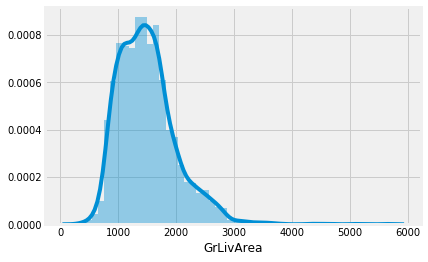

In [19]:
sns.distplot(ames4['GrLivArea'])

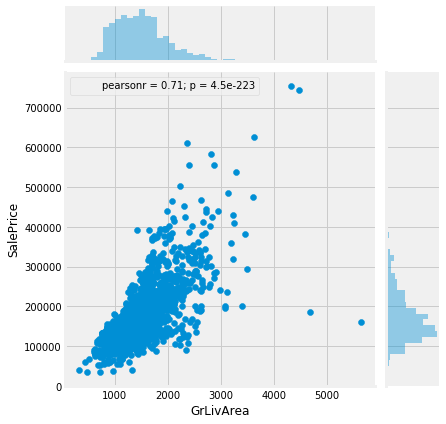

In [20]:
sns.jointplot(x = 'GrLivArea', y = 'SalePrice', data = ames4)

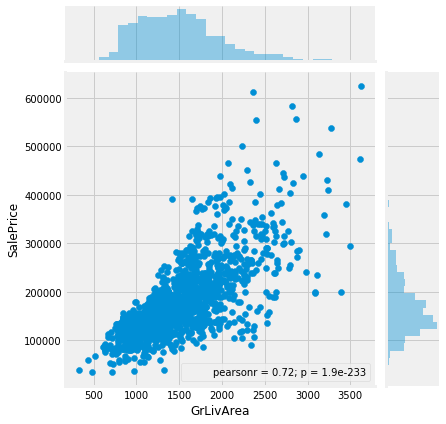

In [21]:
sns.jointplot( x = 'GrLivArea', y = 'SalePrice', data=train_df)

In [22]:
# second variable : TotalBsmtSF
# Calculate first and third quartile
first_quartile = train_df['TotalBsmtSF'].describe()['25%']
third_quartile = train_df['TotalBsmtSF'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
train_df = train_df[(train_data['TotalBsmtSF'] > (first_quartile - 3 * iqr)) &
            (train_df['TotalBsmtSF'] < (third_quartile + 3 * iqr))]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


In [23]:
train_df.shape

(1453, 67)

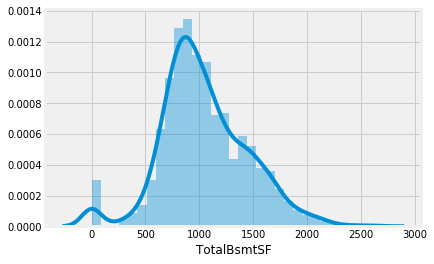

In [24]:
sns.distplot(train_df['TotalBsmtSF'])

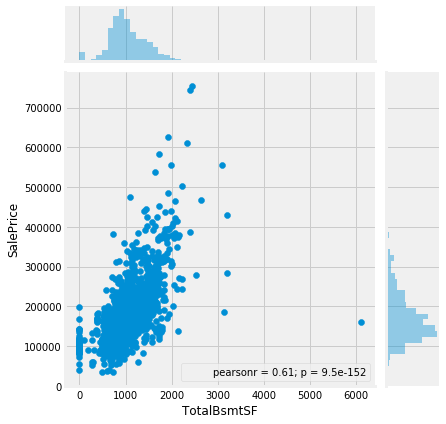

In [25]:
sns.jointplot(x = 'TotalBsmtSF', y = 'SalePrice', data = ames4)

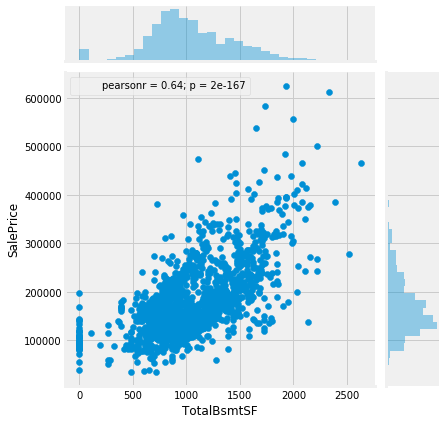

In [26]:
sns.jointplot( x = 'TotalBsmtSF', y = 'SalePrice', data=train_df)

### Explore the target variable

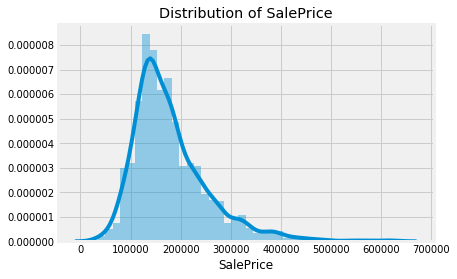

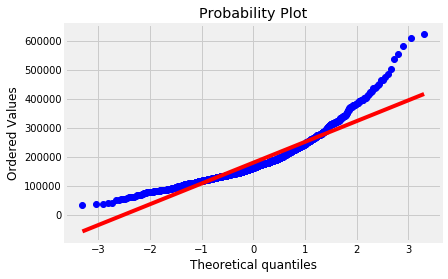

In [27]:
#distribution plot- histogram
sns.distplot(train_df['SalePrice']).set_title("Distribution of SalePrice")

# probability plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)


 mean = 12.02 and std dev = 0.39



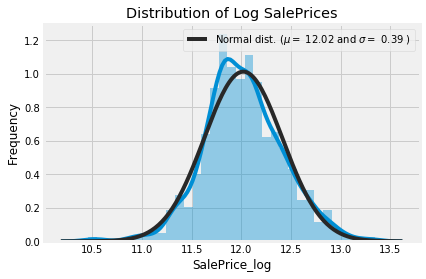

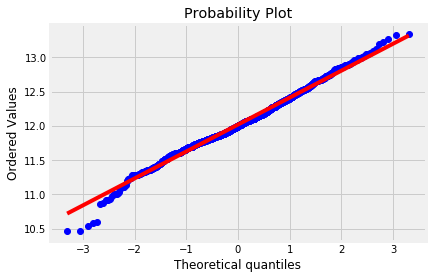

In [28]:
from math import log
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train_df["SalePrice_log"] = train_df['SalePrice'].apply(lambda x: log(x))

#Check the new distribution 
sns.distplot(train_df['SalePrice_log'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['SalePrice_log'])
print( '\n mean = {:.2f} and std dev = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Log SalePrices')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice_log'], plot=plt)
plt.show()

In [29]:
# Drop the price column
train_df.drop('SalePrice', axis = 1, inplace = True)

log transformed the SalePrice in train data
Dropped SalePrice from train data

In [31]:
train_df.to_csv('train_data.csv', index = False)

In [32]:
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

In [33]:
# Check train data information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 67 columns):
Id               1453 non-null int64
MSSubClass       1453 non-null int64
MSZoning         1453 non-null object
LotFrontage      1453 non-null float64
LotArea          1453 non-null int64
Street           1453 non-null object
Alley            1453 non-null object
LotShape         1453 non-null object
LandContour      1453 non-null object
LotConfig        1453 non-null object
LandSlope        1453 non-null object
Neighborhood     1453 non-null object
Condition1       1453 non-null object
Condition2       1453 non-null object
BldgType         1453 non-null object
HouseStyle       1453 non-null object
OverallQual      1453 non-null int64
OverallCond      1453 non-null int64
RoofStyle        1453 non-null object
RoofMatl         1453 non-null object
Exterior1st      1453 non-null object
Exterior2nd      1453 non-null object
MasVnrType       1453 non-null object
MasVnrArea       1453 n

In [34]:
print(train_df.shape)
print(test_df.shape)
# Join train and the test data
joint_df = pd.concat([train_df, test_data], ignore_index=False)

(1453, 67)
(1459, 67)


In [35]:
# Check 2 random observations
train_df.sample(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  TotalBsmtSF Heating HeatingQC CentralAir Electrical  GrLivArea  BedroomAbvGr  KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType GarageFinish  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  HouseAge  Bathrooms  SalePrice_log
360    362          50       RL    66.925489     9144   Pave  Pave      Reg         Lvl    Inside       Gtl      BrkSide       Norm       Norm     1Fam     1.5Fin            5            5     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       TA       TA           No          Rec          Unf        883.0    GasA        Gd          Y      SBrkr       1505             3             1          TA        Typ           0        None     Detchd          Unf       240.0         TA         TA          N           0            0              0          0            0         0   None  None        None        0       7    2008       WD        Normal        78        2.0      11.884489
1412  1420          20       RL   123.447250    16381   Pave  None      IR1         Lvl    Inside       Gtl      Crawfor       Norm       Norm     1Fam     1Story            6            5     Gable  CompShg     Plywood     Plywood    BrkFace       312.0        Gd        Gd     CBlock       TA       TA           Av          Rec          Unf       1844.0    GasA        Gd          Y      SBrkr       1844             3             1          Gd        Typ           1          TA     Attchd          RFn       540.0         TA         TA          Y           0           73            216          0            0         0   None  None        None        0      12    2006       WD        Normal        49        3.0      12.314927

In [36]:
# Check 2 random observations
test_df.sample(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  TotalBsmtSF Heating HeatingQC CentralAir Electrical  GrLivArea  BedroomAbvGr  KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType GarageFinish  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  HouseAge  Bathrooms
475  1936          60       RL         59.0     9535   Pave  None      IR1         Lvl    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            6            5     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA      PConc       Gd       TA           Gd          GLQ          Unf        926.0    GasA        Ex          Y      SBrkr       1604             3             1          TA        Typ           0        None     Attchd          Fin       472.0         TA         TA          Y         100           82              0          0            0         0   None  None        None        0       5    2008       WD        Normal        NaN        20        2.5
567  2028         160       FV         30.0     3180   Pave  Pave      Reg         Lvl    Inside       Gtl      Somerst       Norm       Norm   TwnhsE     2Story            7            5     Gable  CompShg     VinylSd     VinylSd       None         0.0        Gd        TA      PConc       Gd       TA           No          Unf          Unf        689.0    GasA        Ex          Y      SBrkr       1392             2             1          Gd        Typ           0        None     Detchd          Unf       540.0         TA         TA          Y           0          102              0          0            0         0   None  None        None        0       3    2008       WD       Abnorml        NaN        11        2.0

In [37]:
# Check the shape of the joint dataframe
joint_df.shape

(2912, 68)

In [38]:
# Drop the 'SalePrice' column as it is not necessary
joint_df.drop('SalePrice', axis = 1, inplace = True)

In [39]:
# Check the shape of the joint dataframe after dropping the SalePrice column
joint_df.shape

(2912, 67)

In [40]:
# create a list of ordinal variables
ordinal_variable_columns=['HeatingQC','KitchenQual','FireplaceQu',
                   'GarageQual','PoolQC','ExterQual','BsmtQual',
                   'Fence','BsmtCond','GarageCond','ExterCond',
                   'GarageCond','OverallCond','OverallQual']
# label encoder
le = preprocessing.LabelEncoder()

for col in ordinal_variable_columns:
    le.fit(joint_df[col])
    joint_df[col] = le.transform(joint_df[col])

In [41]:
# create a list of categorical columns for one hot encoding
cat_variables= ['MSSubClass','MSZoning','Street','Alley','LotShape','LotConfig','LandContour','BsmtExposure',
                'BldgType','CentralAir','Condition1','Condition2','Electrical','Exterior1st','Exterior2nd',
                'Foundation','Functional','GarageFinish','GarageType','Heating','HouseStyle','LandSlope',
                'SaleCondition','RoofStyle','RoofMatl','MasVnrType','BsmtFinType1', 'BsmtFinType2',
                'HouseAge','YrSold','MoSold','Neighborhood','PavedDrive','MiscFeature',
                'SaleType']

# One-Hot encoding to convert categorical columns to numeric
print('start one-hot encoding')

joint_df = pd.get_dummies(joint_df, prefix = cat_variables,
                         columns = cat_variables, drop_first=True )

print('one-hot encoding done')

start one-hot encoding
one-hot encoding done


In [42]:
# Check the shape of the joint dataframe after one-hot encoding
joint_df.shape

(2912, 356)

In [46]:
# Now separate the joint dataframe into train and test data
train_final = joint_df.iloc[:1453,:]
test_final = joint_df.iloc[1453:,:]

In [47]:
print(train_final.shape)
print(test_final.shape)

(1453, 356)
(1459, 356)


### Save train and test datasets

In [48]:
train_final.to_csv('train_df_final.csv', index = False)
test_final.to_csv('test_df_final.csv', index = False)

## Miscellaneous Plots

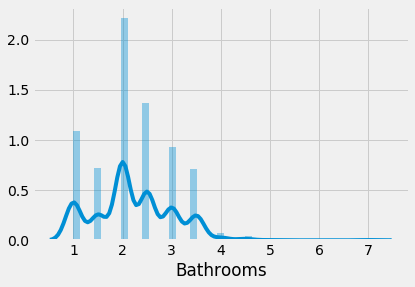

In [475]:
sns.distplot(ames4['Bathrooms'])

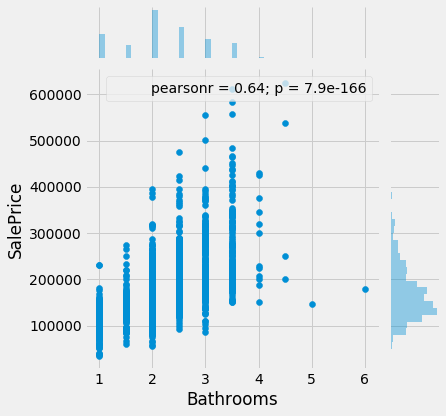

In [476]:
sns.jointplot( x = 'Bathrooms', y = 'SalePrice', data=train)

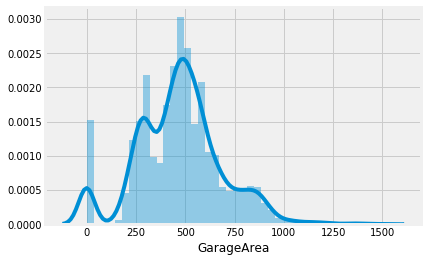

In [365]:
sns.distplot(ames4['GarageArea'])

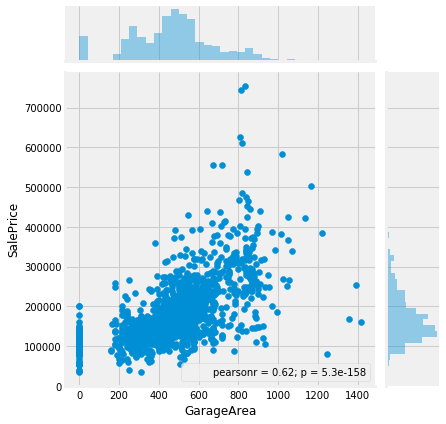

In [366]:
sns.jointplot( x = 'GarageArea', y = 'SalePrice', data=ames4)

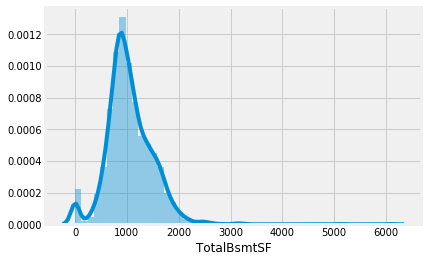

In [367]:
sns.distplot(ames4['TotalBsmtSF'])

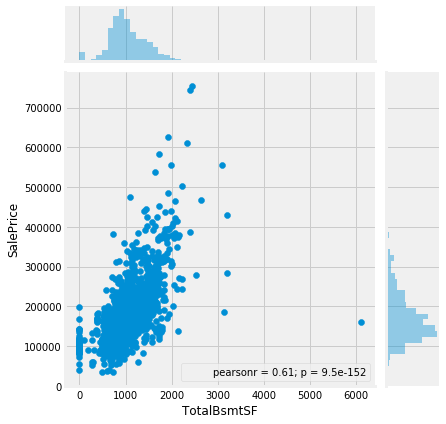

In [368]:
sns.jointplot( x = 'TotalBsmtSF', y = 'SalePrice', data=ames4)

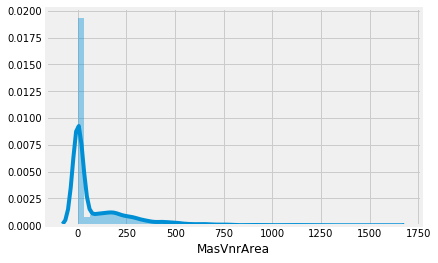

In [369]:
sns.distplot(ames4['MasVnrArea'])

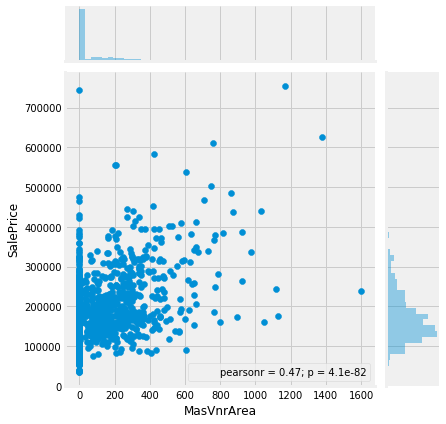

In [370]:
sns.jointplot( x = 'MasVnrArea', y = 'SalePrice', data=ames4)

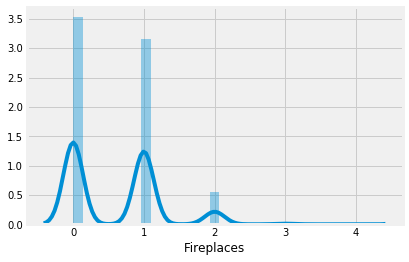

In [371]:
sns.distplot(ames4['Fireplaces'])

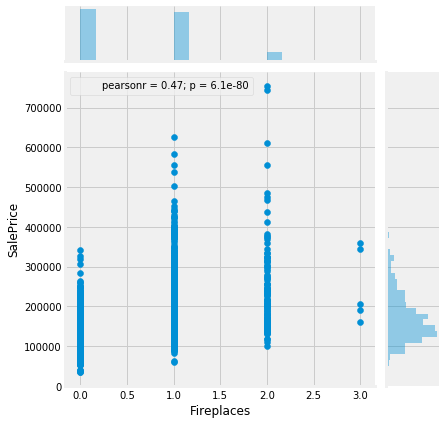

In [372]:
sns.jointplot( x = 'Fireplaces', y = 'SalePrice', data=ames4)

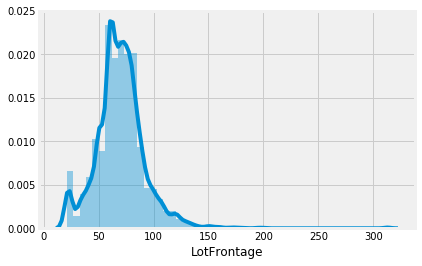

In [373]:
sns.distplot(ames4['LotFrontage'])

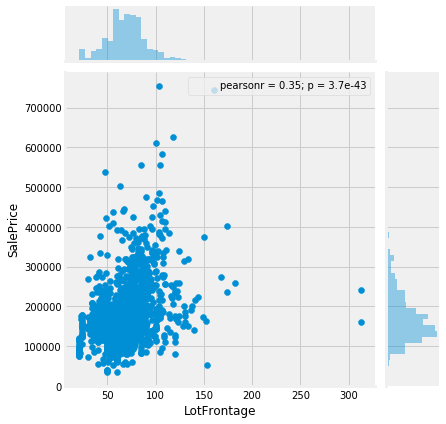

In [374]:
sns.jointplot( x = 'LotFrontage', y = 'SalePrice', data=ames4)

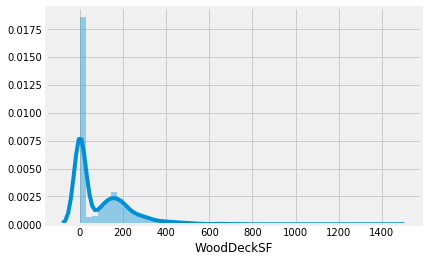

In [375]:
sns.distplot(ames4['WoodDeckSF'])

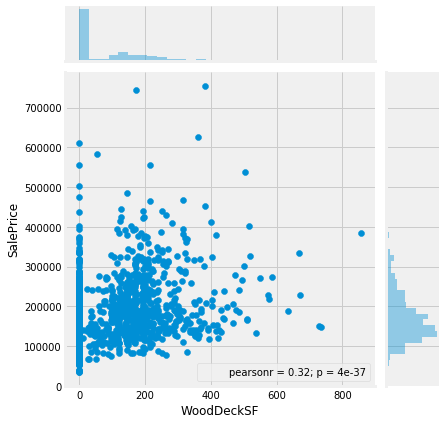

In [376]:
sns.jointplot( x = 'WoodDeckSF', y = 'SalePrice', data=ames4)

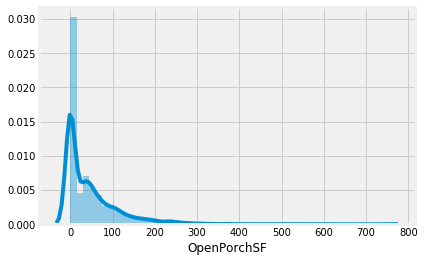

In [377]:
sns.distplot(ames4['OpenPorchSF'])

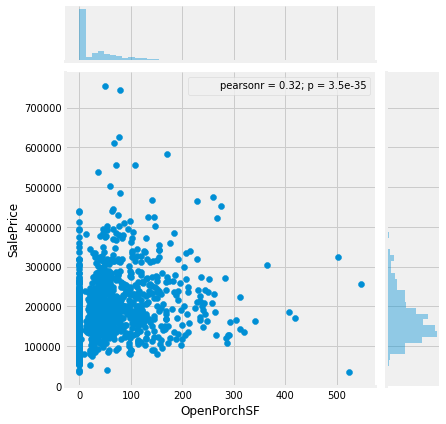

In [378]:
sns.jointplot( x = 'OpenPorchSF', y = 'SalePrice', data=ames4)

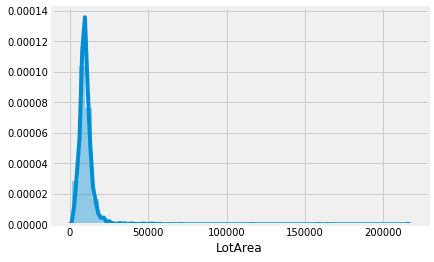

In [379]:
sns.distplot(ames4['LotArea'])

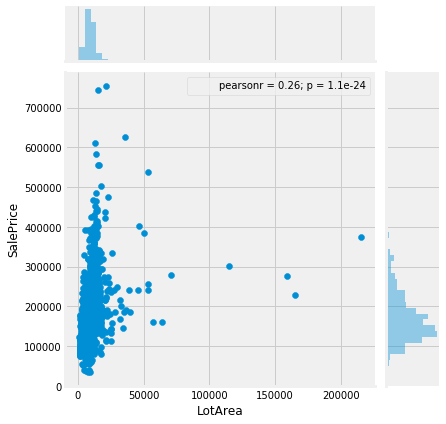

In [380]:
sns.jointplot( x = 'LotArea', y = 'SalePrice', data=ames4)

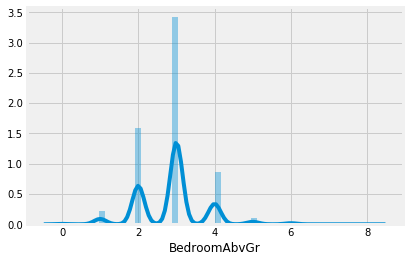

In [381]:
sns.distplot(ames4['BedroomAbvGr'])

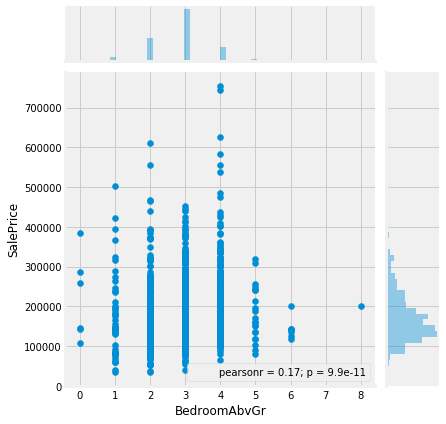

In [382]:
sns.jointplot( x = 'BedroomAbvGr', y = 'SalePrice', data=ames4)

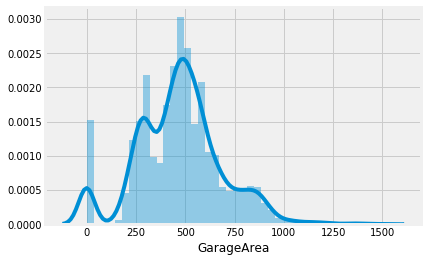

In [385]:
sns.distplot(ames4['GarageArea'])


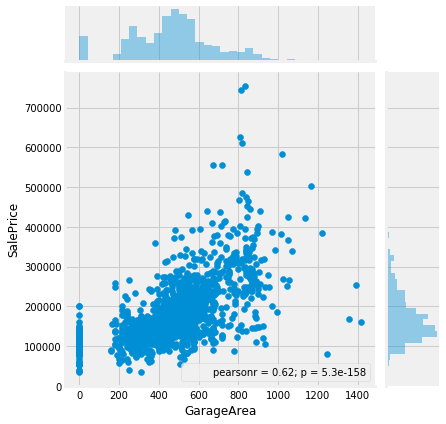

In [384]:
sns.jointplot( x = 'GarageArea', y = 'SalePrice', data=ames4)